# Title: Imputation Methods for Missing data - Worked Examples
**Author: Yanyan Chen**

**NUID: 002799697**

# Introduction
Missing data is a common problem in data science engineering, and it can occur for various reasons, such as non-answering questions, data entry errors, or data loss during data collection. The presence of missing data can negatively affect the results of data analysis. Missing data can lead to biased or inefficient estimates, reduce the accuracy of statistical analyses, and limit the generalizability of findings. Therefore, dealing with missing data is an important part of data cleaning and pre-processing. A common method for dealing with missing data is imputation, in which missing values are filled in with estimates. In this tutorial, we will explain the types of missing data and the various imputation methods that can be used to handle these data.

The written section of this tutorial has taken you quickly through the concept of missing data in a dataset and its types, and step by step through the different types of imputation methods and which of the different types of missing data situations they are best suited for. A complex dataset is also used to examine the effectiveness of different imputation methods for filling in different missing cases. In this worked example section, two very different datasets from kaggle are used to examine and calibrate the effect of three different methods of mean, knn, and mice to fill in datasets with different degrees of missing data.

This tutorial will provide a good starting point for those who wish to work with data. Through a step-by-step guide, you will be able to get an in-depth practical appreciation of the differences in the effectiveness of different imputation methods for filling different missing cases.

# 1. Worked Example 1: Spaceship Titanic Dataset
After detailing the three fill methods we are going to use in written section, we now move on to the dataset we are going to work on.

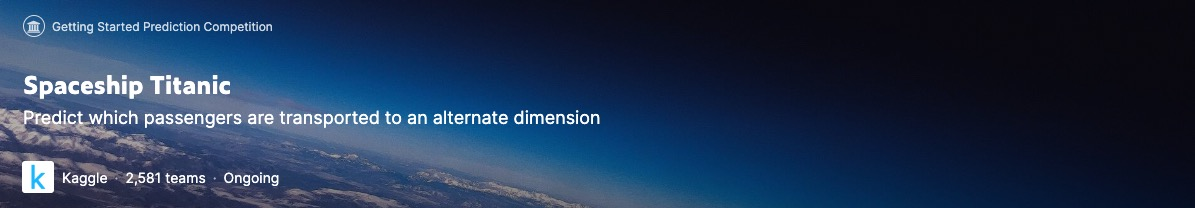

This dataset is from Kaggle prediction competition. We need to predict which passengers are transported to an alternate dimension. Obviously, the answer will be yes or no. Mathematically, the answers will be a zero and one. Basically, the model is a classification machine learning model.

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Step 1: Import package / libraries
First, we must import the basic libraries needed to process the data, build the neural network and visualize the results. This tutorial uses various libraries such as pandas, numpy, matplotlib. these libraries will allow us to perform the necessary data processing, build and train our models, and present the results visually. By importing these libraries, we can simplify our workflow and focus on implementing the necessary code.

In [ ]:
# Package / Libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

## Step 2: Load raw data
This part of the task involves importing data from the specified file path and then storing it in a pandas DataFrame. Here we pass the dataset to GitHub to import it as raw data.

In [ ]:
# loading the raw data

raw_data = pd.read_csv("https://raw.githubusercontent.com/ychetuo9/ychetuo9-INFO6105_Chen_Yanyan_002799697/main/CSV/train.csv")
evaluation_data = pd.read_csv("https://raw.githubusercontent.com/ychetuo9/ychetuo9-INFO6105_Chen_Yanyan_002799697/main/CSV/test.csv")
submission_example = pd.read_csv("https://raw.githubusercontent.com/ychetuo9/ychetuo9-INFO6105_Chen_Yanyan_002799697/main/CSV/sample_submission.csv")

print('raw_data', raw_data.shape)
print('evaluation_data', evaluation_data.shape)
print('submission_example', submission_example.shape)

raw_data (8693, 14)
evaluation_data (4277, 13)
submission_example (4277, 2)


You can see here that we also use .shape function, which is a file that can be used to fetch the dimensions of Pandas and NumPy type objects in python. We can see that there are 8693 rows and 14 columns in raw_data. 4277 rows and 13 columns in evaluation_data. 4277 and 2 columns in submission_example.

In [ ]:
#Viewing data in the file
raw_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


From this part we can see that:
1. There are 8693 observations in the raw data.
2. The dataset has both categorical data and numeric data.
3. There are 11 independent variables of the raw data i.e. HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck.

## Step 3: Check missing value
The next step is to monitor for missing values, and here we use the isnull() function. The isnull() function is used to detect missing values for an array-like object.

From this part we can see that:
1. Yes, there are missing values.
2. In raw data set, all the features have missing values.

In [ ]:
# Checking for null values

raw_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We can know from the result that all the features have missing values, of course including all the independent variable.
1. There are 11 independent variables of the raw data, they are HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck. And they all have missing value.
2. For HomePlanet, 201 data are missing.
3. For CryoSleep, 217 data are missing
4. For Cabin, 199 data are missing.
5. For Destination, 182 data are missing.
6. For Age, 179 data are missing.
7. For RoomService, 181 data are missing.
7. For FoodCourt, 183 data are missing.
7. For ShoppingMall, 208 data are missing.
7. For Spa, 183 data are missing.
7. For VRDeck, 188 data are missing.
7. For VIP, 203 data are missing.

##Step 4: Change types for visualizing
1. Make 'PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name', 'Transported' turn to String type.
2. Make  'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' turn to float type.

In [ ]:
# changing the types so we can visualize

strings = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Name', 'Transported']
numeric = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for s in strings:
    raw_data[s] = raw_data[s].astype(str)

for n in numeric:
    #raw_data[n][raw_data[n] == 'Unknown'] = 0
    raw_data[n] = raw_data[n].astype(float)

##Step 5: Investigate all the elements whithin each Feature

In [ ]:
# Investigate all the elements whithin each Feature

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()

    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature PassengerId :8693
The number of values for feature HomePlanet :4 -- ['Earth' 'Europa' 'Mars' 'nan']
The number of values for feature CryoSleep :3 -- ['False' 'True' 'nan']
The number of values for feature Cabin :6561
The number of values for feature Destination :4 -- ['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' 'nan']
The number of values for feature Age :81
The number of values for feature VIP :3 -- ['False' 'True' 'nan']
The number of values for feature RoomService :1274
The number of values for feature FoodCourt :1508
The number of values for feature ShoppingMall :1116
The number of values for feature Spa :1328
The number of values for feature VRDeck :1307
The number of values for feature Name :8474
The number of values for feature Transported :2 -- ['False' 'True']


##Step 6: Data Cleaning
After investigating all the elements whithin each Feature, we can see that in Cabin feature, there are 6561 observation. This will be very inconvenient for our data analysis and model building. In this case, we need to cleaning this feature's data.

First, we should check the unique values in Cabin feature. It is very clear that they are all in the same format.

In [ ]:
raw_data['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S',
       'F/3/S', 'B/1/P', 'F/1/P', 'G/1/S', 'F/2/P', 'nan', 'F/3/P',
       'F/4/P', 'F/5/P', 'G/0/P', 'F/6/P', 'E/0/S', 'D/0/P', 'C/2/S',
       'F/6/S', 'C/0/P', 'F/8/P', 'G/4/S', 'F/9/P', 'D/1/S', 'D/1/P',
       'F/8/S', 'F/10/S', 'G/1/P', 'G/2/P', 'B/3/P', 'G/3/P', 'F/10/P',
       'E/1/S', 'E/2/S', 'G/6/S', 'F/11/S', 'A/1/S', 'G/7/S', 'F/12/S',
       'F/13/S', 'F/14/S', 'E/3/S', 'G/6/P', 'G/10/S', 'F/15/S', 'E/4/S',
       'F/16/S', 'F/13/P', 'F/14/P', 'F/17/S', 'D/3/P', 'C/3/S', 'F/18/S',
       'F/15/P', 'C/4/S', 'G/13/S', 'F/16/P', 'G/14/S', 'C/5/S', 'F/17/P',
       'E/5/S', 'G/15/S', 'G/16/S', 'F/20/S', 'G/9/P', 'A/2/S', 'G/11/P',
       'F/19/P', 'G/12/P', 'F/23/S', 'F/24/S', 'G/18/S', 'F/21/P',
       'D/2/S', 'G/19/S', 'B/5/P', 'E/6/S', 'B/1/S', 'F/23/P', 'G/20/S',
       'F/24/P', 'D/4/P', 'A/0/P', 'F/25/P', 'G/21/S', 'F/27/P', 'F/27/S',
       'E/7/S', 'D/3/S', 'E/8/S', 'G/22/S', 'F/29/S', 'D/5/S', 'G

We can learn from Kaggle website that the Cabin data actually consist of 3 parts, which are deck, number and side. It takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [ ]:
# investigating Cabin
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_rows", None)

raw_data['Cabin'].unique()
raw_data['Cabin'].value_counts()

nan         199
G/734/S       8
C/137/S       7
B/201/P       7
G/109/P       7
G/981/S       7
D/176/S       7
F/1411/P      7
C/21/P        7
B/11/S        7
F/1194/P      7
E/13/S        7
G/1476/S      7
G/1368/P      7
B/82/S        7
G/1108/P      6
F/856/P       6
C/225/P       6
G/1448/S      6
E/82/P        6
D/56/P        6
C/255/S       6
G/330/P       6
F/859/P       6
G/150/S       6
G/117/S       6
G/943/S       6
G/230/S       6
G/186/S       6
A/67/P        6
C/125/S       6
G/377/P       6
G/383/S       6
B/19/S        6
C/42/P        6
G/765/S       6
C/230/S       6
C/82/P        6
B/183/S       6
E/0/S         6
G/974/P       6
G/1460/S      6
G/292/S       6
G/1046/S      6
C/319/S       6
F/1808/P      6
G/657/P       6
C/306/S       6
C/91/P        5
C/95/S        5
G/732/S       5
D/35/S        5
G/757/P       5
G/37/P        5
D/227/P       5
B/185/P       5
C/176/S       5
E/352/P       5
C/235/P       5
G/1313/S      5
B/86/P        5
G/1032/P      5
C/329/S 

Now, we need to clean the Cabin data. Before changing original Cabin's data frame, we need to copy the data file. Then, in order to add these 3 new columns (deck/num/side), we need to first name them and split the Cabin data every time finding the slash. After this, the data has been reframed. There is no Cabin feature in data set.

In [ ]:
# cleaning the Cabin

# creating a copy file
raw_data_clean = raw_data.copy()

# adding 3 more columns
raw_data_clean[['Deck', 'Num', 'Side']] = raw_data_clean['Cabin'].str.split('/', expand=True)

del raw_data_clean['Cabin']

raw_data_clean.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


##Step 7: Visualize the Data

### numeric data
Now, for better investigate the data, we visualize the numeric data by using seaborn Pairplots.
As we can see, it's not that easy to pick up results since the relationship is not that obvious. However, we still could break it down and see that people who got transported usually don't spend that much on Spa but spend a lot on food count.

#### **This code may take a bit longer to run, probably around 40 to 55 seconds, but the code is correct and works*

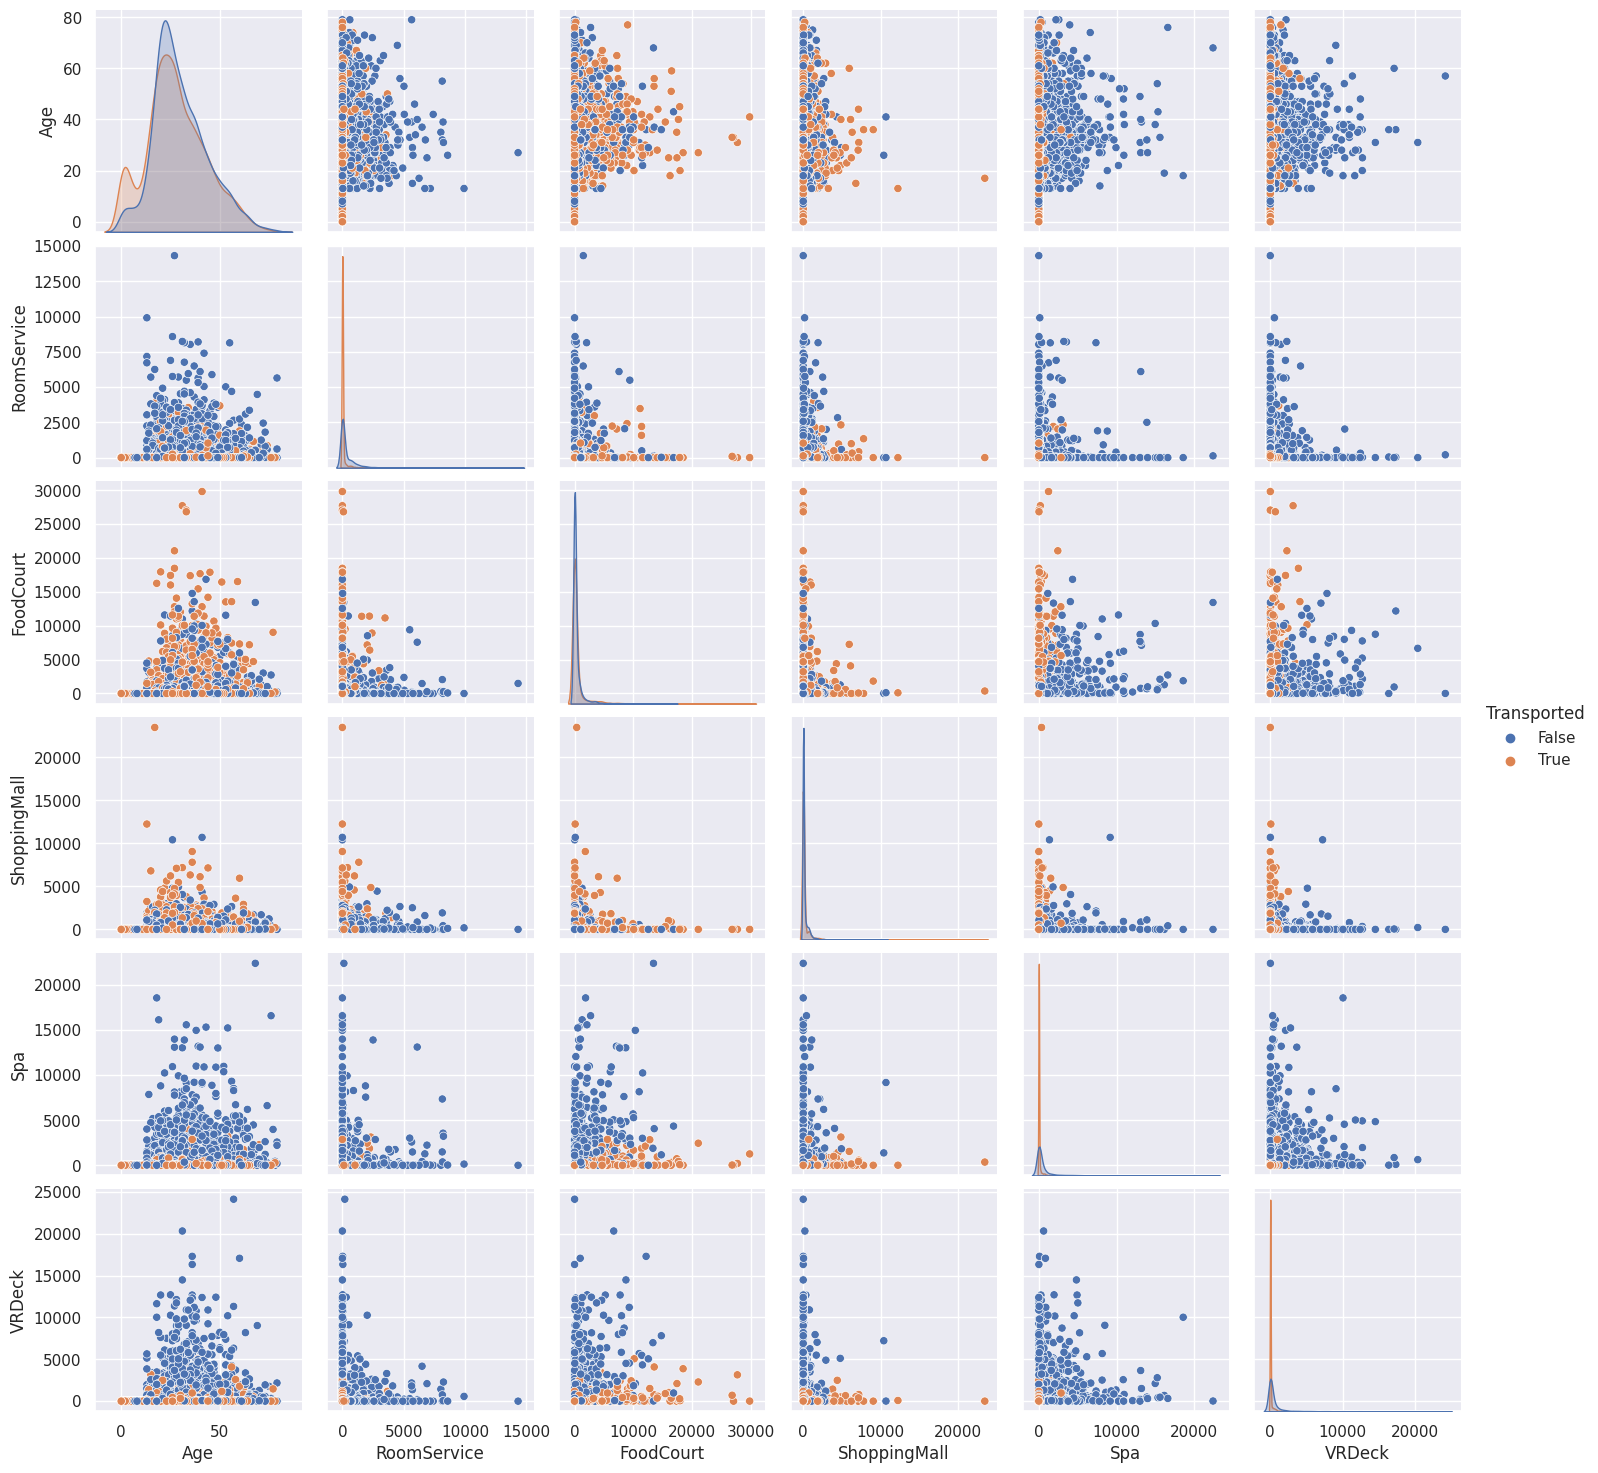

In [ ]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data_clean[[ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']], hue = 'Transported')#, height = 5, kind="reg")

By using seaborn pairplots, we can clearly see that there is no obvious collinearity between these features. Therefore, we can answer this question that these predictor variables are all independent of all the other predictor variables.

### categorical data


For categorical data, we first specify the categories so the columns we want to look through ('HomePlanet', 'CryoSleep', 'Destination','VIP', 'Transported', 'Deck','Num','Side'). Then we set the size of the plot and then down here we say for f feature in these categories. Next, we traverse and count the number of people who got transported and who didn't in each category.

***This code is completely correct and works, but matplotlib 3.4. is required since bar_label came in for 3.4. Please check the matplotlib version in current environment if you find there is something wrong with it**


In [ ]:
# check matplotlib version in current environment
import matplotlib
print(matplotlib.__version__)

3.7.1


***If you run the program with Google colab, you will find that Google colab comes with version 3.2, so when you execute the program for the first time, the program breaks because of the version issue.**

**Here comes the program to install the newer version, but please note that you must click the button restart runtime and then you need to re-click [Code Execution Program > Run All]**

**After running the program all over again for the second time, all the code will run normally**

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***Please note that you must click the button RESTART RUNTIME and then you need to re-click [Code Execution Program > Run All]**

**After running the program all over again for the second time, all the code will run normally**

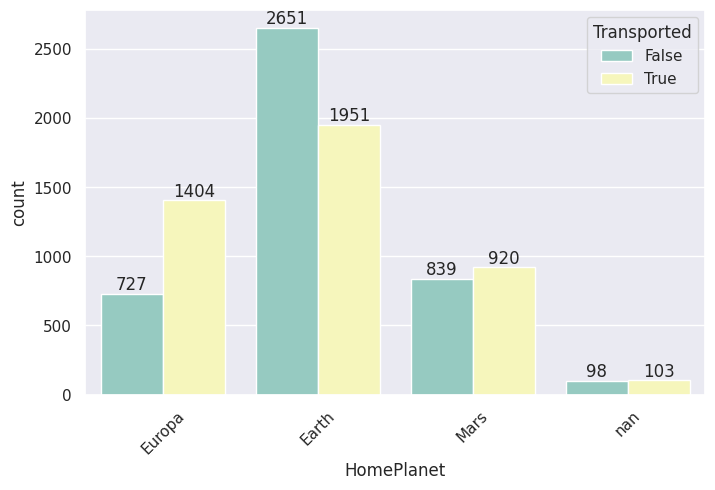

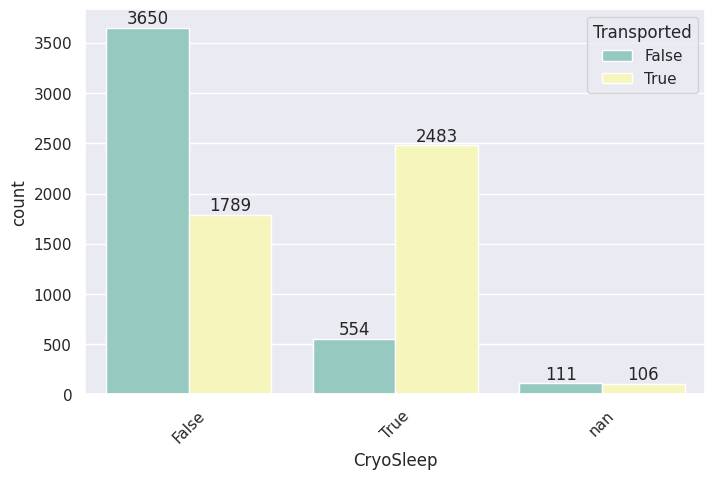

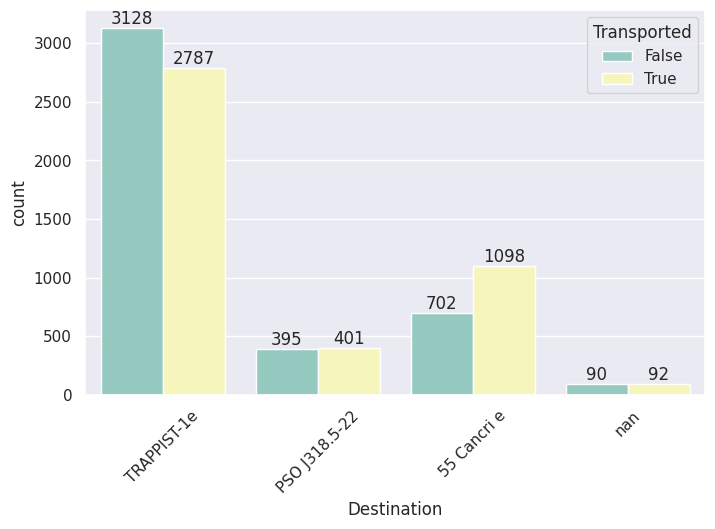

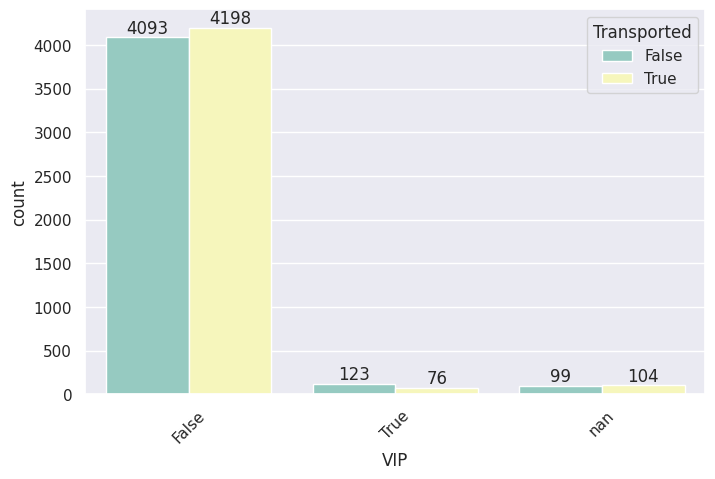

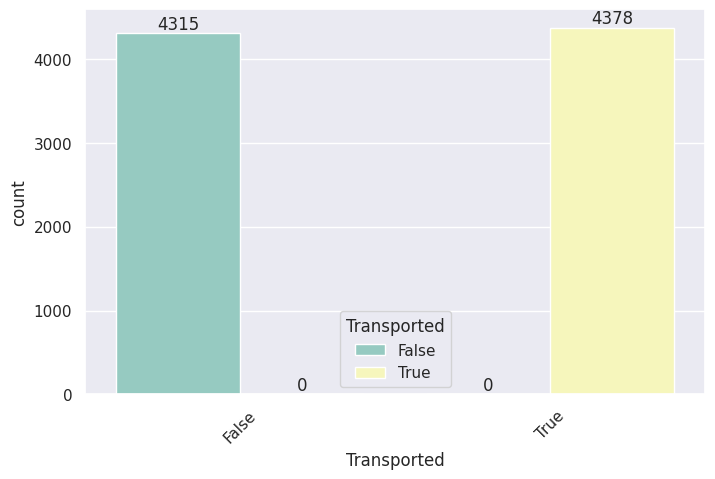

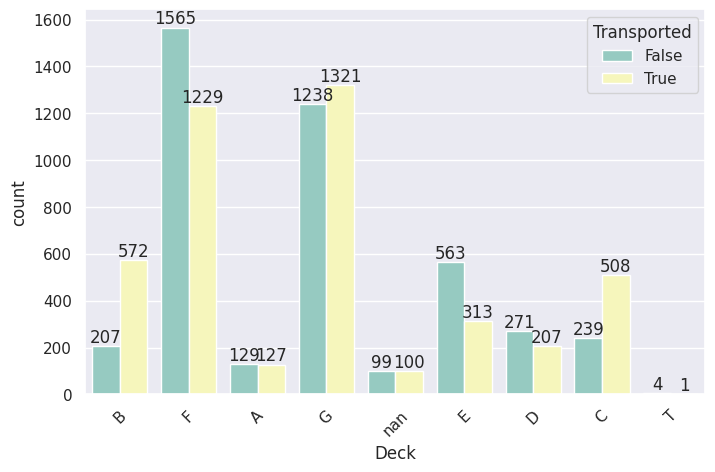

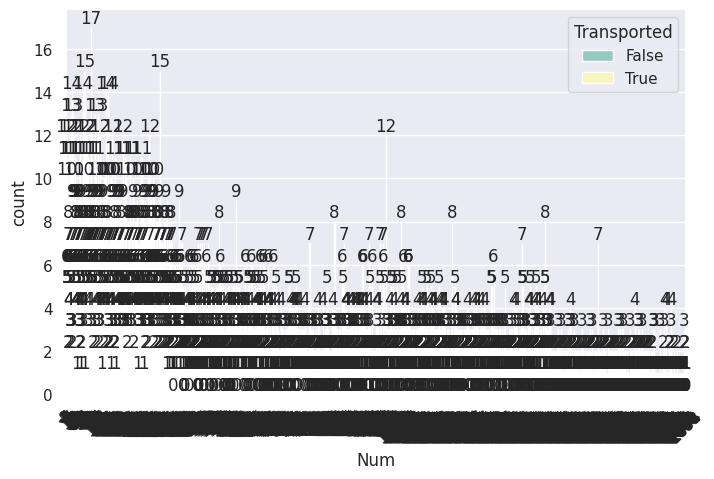

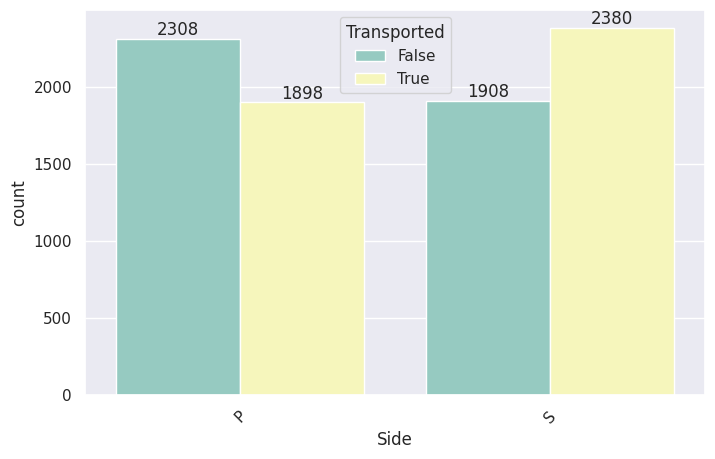

In [ ]:
categories = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Transported', 'Deck','Num','Side']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for f in categories:
    ax = sns.countplot(x = f, data = raw_data_clean, palette = 'Set3', hue = 'Transported')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.show()

We can see from here that we need to better investigate the num because its content are actually numbers even if it is a category in this dataset.
First, we check the unique value of the num.

In [ ]:
raw_data_clean['Num'].unique()

array(['0', '1', '2', '3', None, '4', '5', '6', '8', '9', '10', '11', '7',
       '12', '13', '14', '15', '16', '17', '18', '20', '19', '23', '24',
       '21', '25', '27', '22', '29', '30', '31', '26', '32', '28', '37',
       '35', '38', '36', '41', '42', '33', '34', '44', '45', '46', '40',
       '47', '48', '43', '50', '52', '53', '54', '49', '56', '51', '59',
       '61', '63', '64', '65', '55', '67', '60', '68', '72', '73', '62',
       '74', '57', '76', '78', '66', '82', '83', '84', '85', '69', '89',
       '90', '71', '91', '92', '96', '75', '97', '77', '79', '98', '99',
       '80', '81', '100', '101', '86', '87', '103', '70', '88', '109',
       '93', '110', '95', '111', '102', '114', '115', '116', '105', '117',
       '107', '108', '118', '120', '121', '39', '123', '124', '125',
       '126', '94', '128', '129', '131', '133', '112', '113', '135',
       '136', '137', '138', '140', '141', '142', '143', '104', '144',
       '145', '146', '122', '147', '127', '149', '150', '132

There are so many values of the num. Thus, we need to increase the size of the plot which is about to be created. Then we save these raw_data_clean into a new data frame and name it as num_test_raw. Next, we save it everything but where the num is NA and then change the num into integer for applying calculation. Finally, we create an histplot to display it.

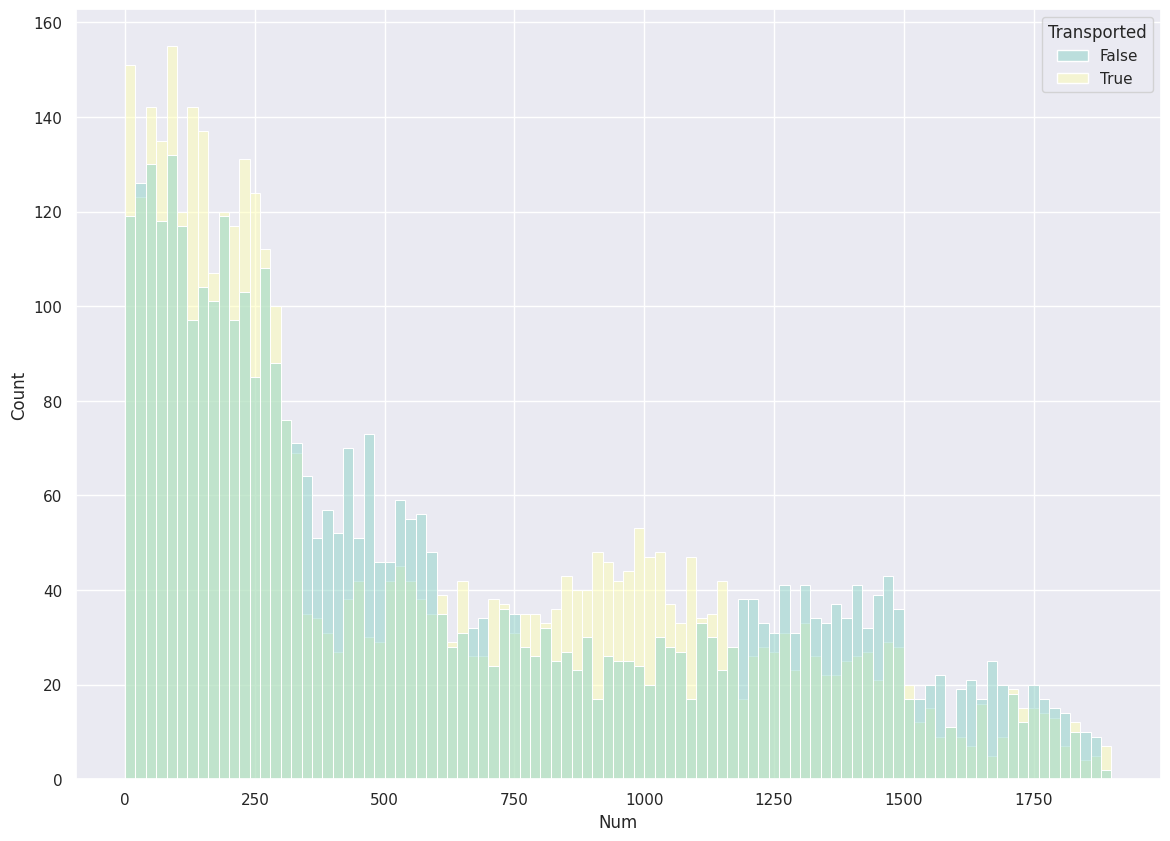

In [ ]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(14,10)})

num_test_raw = raw_data_clean.copy()

num_test_raw = num_test_raw[~num_test_raw['Num'].isna()]
num_test_raw['Num'] = num_test_raw['Num'].astype(int)

ax = sns.histplot(x = 'Num', data = num_test_raw, palette = 'Set3', hue = 'Transported', binwidth=20)

The histplot help us identify how we should break the data so it can work for our model. Here, we create 7 new categories for better classification.

1. Num<=300, Cabin Category A
2. Num>300, Cabin Category B
3. Num>600, Cabin Category C
4. Num>900, Cabin Category D
5. Num>1200, Cabin Category E
6. Num>1500, Cabin Category F
7. Num>1800, Cabin Category G

In [ ]:
# creating a new field for cabin number based on findings

raw_data_clean['Num'][raw_data_clean['Num'].isna()] = 99999
raw_data_clean['Num'] = raw_data_clean['Num'].astype(int)

raw_data_clean['Cabin_Category'] = 'Uknown'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] <= 300 ] = 'Cabin Category A'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 300 ] = 'Cabin Category B'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 600 ] = 'Cabin Category C'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 900 ] = 'Cabin Category D'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1200 ] = 'Cabin Category E'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1500 ] = 'Cabin Category F'
raw_data_clean['Cabin_Category'][raw_data_clean['Num'] > 1800 ] = 'Cabin Category G'

# putting the np.nan back
raw_data_clean['Num'][raw_data_clean['Num'] == 99999] = np.nan

raw_data_clean['Cabin_Category'].value_counts()

Cabin Category A    3569
Cabin Category B    1484
Cabin Category D     991
Cabin Category C     976
Cabin Category E     937
Cabin Category F     459
Cabin Category G     277
Name: Cabin_Category, dtype: int64

## Step 8: Pre-process for Missing Values
Since we have a lot of missing values for each variable (not the same row), we will try to fill in the missing values and not drop them. One of the most common techniques is to replace the continues values with the median and the categorical features with the mode

In [ ]:
# changing missing values to mode and median

strings2 = ['HomePlanet', 'CryoSleep', 'Destination','VIP','Transported', 'Deck', 'Cabin_Category', 'Side']
numeric2 = [ 'Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

for s in strings2:
    mode = raw_data_clean[s].mode()[0]
    raw_data_clean[s]= raw_data_clean[s].fillna(mode)
    raw_data_clean[s][raw_data_clean[s] == 'nan'] = mode

for n in numeric2:
    median = raw_data_clean[n].median()
    raw_data_clean[n]= raw_data_clean[n].fillna(median)

Now, we can confirm the missing values again. And there is no missing value now.

In [ ]:
raw_data_clean.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Deck              0
Num               0
Side              0
Cabin_Category    0
dtype: int64

## Step 9: Check the range

### outliers
After the investigation of distributions, we can identify data outliers by using boxplot. We can see which columns have lots of outliers or which columns we need to scale.

Age


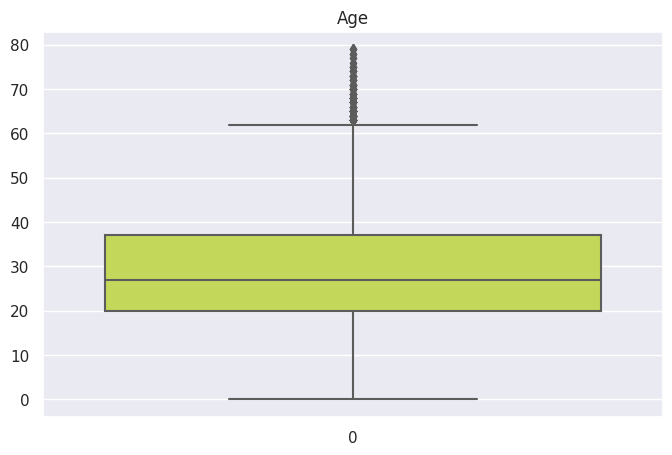

RoomService


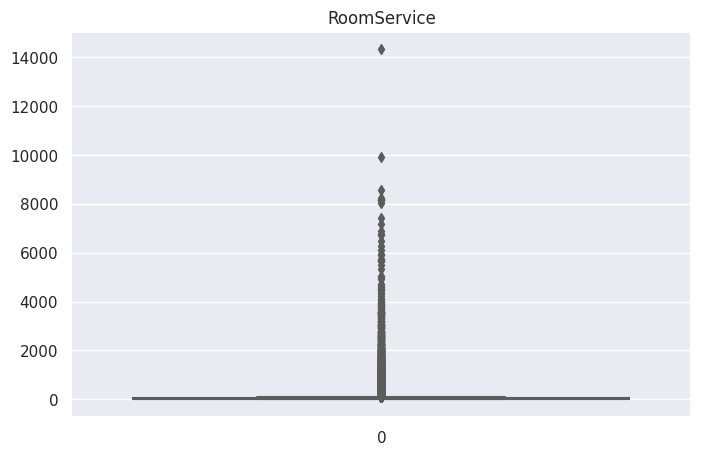

FoodCourt


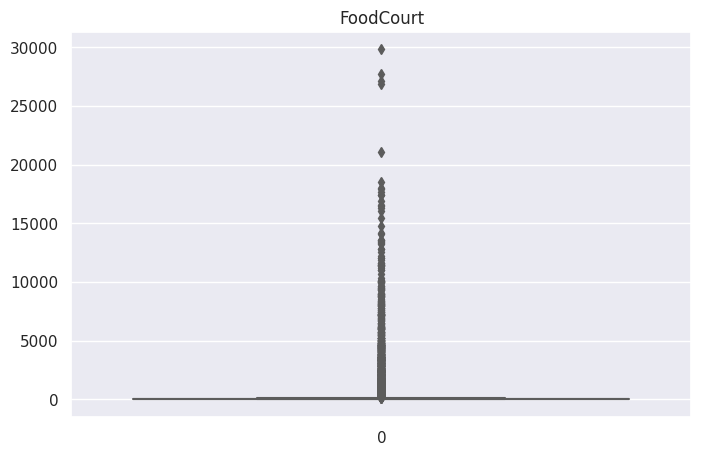

ShoppingMall


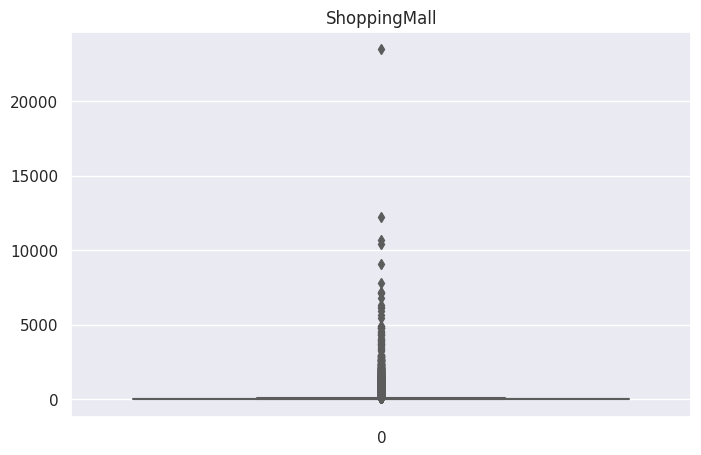

Spa


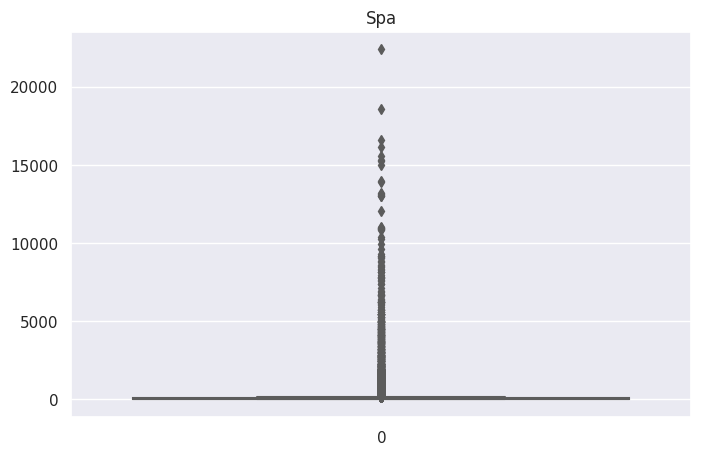

VRDeck


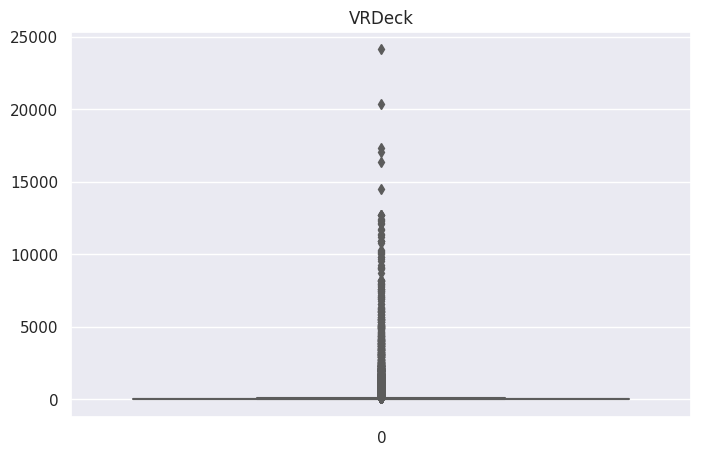

Num


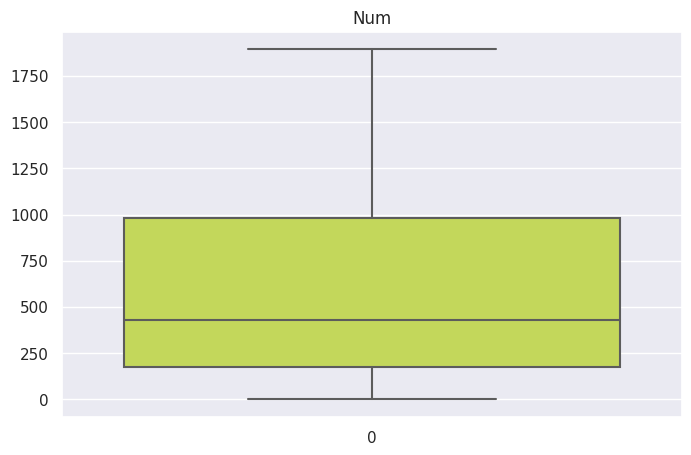

In [ ]:
# Investigating the outliers

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in numeric2:
    print(c)
    x = raw_data_clean[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    plt.title(c)
    plt.show()

From this part, we can see that there are a few outliners which is larger than 20000 in the 'FoodCourt' picture. They are kind of way outside outliners versus other outliners. We can check them.

In [ ]:
raw_data_clean[raw_data_clean['FoodCourt'] > 20000]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Cabin_Category
1213,1292_01,Europa,False,55 Cancri e,31.0,True,0.0,27723.0,3.0,202.0,3146.0,Scharab Conale,True,B,55.0,S,Cabin Category A
1842,1969_01,Europa,False,55 Cancri e,27.0,False,0.0,21066.0,0.0,2448.0,2293.0,Unukath Sandul,True,C,75.0,S,Cabin Category A
2067,2215_01,Europa,False,55 Cancri e,41.0,True,0.0,29813.0,0.0,1257.0,6.0,Pulchib Quidedbolt,True,A,27.0,S,Cabin Category A
3198,3444_01,Europa,False,55 Cancri e,33.0,False,0.0,27071.0,0.0,15.0,0.0,Ainoxa Scerodbox,True,B,131.0,S,Cabin Category A
3538,3796_01,Europa,False,55 Cancri e,33.0,False,90.0,26830.0,0.0,27.0,703.0,Dhena Semageary,True,B,121.0,P,Cabin Category A


In [ ]:
raw_data_clean[raw_data_clean['RoomService'] > 8000]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Cabin_Category
928,0992_04,Europa,False,55 Cancri e,35.0,True,8030.0,300.0,0.0,0.0,1436.0,Naosa Herpumble,False,F,427.0,S,Cabin Category G
1177,1243_02,Europa,False,TRAPPIST-1e,32.0,False,8168.0,69.0,11.0,371.0,0.0,Geno Oderient,False,A,9.0,P,Cabin Category A
4416,4690_02,Europa,False,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False,F,427.0,S,Cabin Category G
4762,5084_02,Europa,False,TRAPPIST-1e,32.0,False,8151.0,2052.0,1919.0,7352.0,754.0,Batrix Fuelightic,False,E,315.0,P,Cabin Category B
5105,5455_01,Mars,False,55 Cancri e,13.0,False,9920.0,0.0,180.0,130.0,571.0,Varkes Nate,False,E,344.0,P,Cabin Category B
5725,6066_02,Europa,False,55 Cancri e,55.0,False,8142.0,8.0,0.0,1481.0,0.0,Terion Mallisly,False,C,226.0,S,Cabin Category A
7118,7585_02,Europa,False,TRAPPIST-1e,39.0,False,8209.0,18.0,432.0,3560.0,54.0,Azhasim Admingried,False,C,281.0,S,Cabin Category A
7933,8470_01,Europa,False,55 Cancri e,31.0,True,8243.0,280.0,0.0,3220.0,2285.0,Brafirk Aloubtled,False,C,281.0,P,Cabin Category A
8626,9202_01,Europa,False,TRAPPIST-1e,26.0,False,8586.0,77.0,114.0,29.0,4.0,Alark Eguing,False,C,309.0,P,Cabin Category B


In [ ]:
raw_data_clean[raw_data_clean['ShoppingMall'] > 10000]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Cabin_Category
4724,5040_01,Europa,False,TRAPPIST-1e,26.0,False,0.0,21.0,10424.0,1373.0,7218.0,Enibik Dynigic,False,C,195.0,S,Cabin Category A
6223,6583_01,Europa,False,TRAPPIST-1e,13.0,False,0.0,100.0,12253.0,6.0,80.0,Charda Sunlove,True,B,254.0,S,Cabin Category A
7425,7941_01,Europa,False,TRAPPIST-1e,41.0,False,0.0,116.0,10705.0,9181.0,10.0,Alrakan Apedishaft,False,C,257.0,P,Cabin Category A
8415,8989_01,Europa,False,TRAPPIST-1e,17.0,False,0.0,366.0,23492.0,356.0,3.0,nan,True,B,291.0,P,Cabin Category A


In [ ]:
raw_data_clean[raw_data_clean['Spa'] > 10000]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Cabin_Category
154,0177_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,10346.0,1.0,14970.0,2111.0,Toperon Iniouser,False,B,2.0,S,Cabin Category A
1095,1161_02,Europa,False,55 Cancri e,19.0,False,0.0,1291.0,0.0,16139.0,687.0,Mirfark Anderking,False,B,48.0,S,Cabin Category A
1390,1455_05,Europa,False,55 Cancri e,76.0,False,0.0,2732.0,422.0,16594.0,330.0,Antino Wassird,False,B,62.0,S,Cabin Category A
1598,1696_01,Europa,False,TRAPPIST-1e,43.0,False,0.0,760.0,17.0,15331.0,427.0,Alam Iderinelay,False,B,55.0,P,Cabin Category A
1980,2117_01,Europa,False,TRAPPIST-1e,31.0,False,0.0,8718.0,0.0,13036.0,267.0,Azet Rocketedy,False,F,427.0,S,Cabin Category G
2324,2506_01,Earth,False,55 Cancri e,38.0,False,0.0,2506.0,46.0,11001.0,5.0,Caphirk Apenelexy,False,A,19.0,P,Cabin Category A
2464,2645_02,Europa,False,TRAPPIST-1e,42.0,False,3.0,2174.0,0.0,10860.0,2564.0,Tach Improus,False,C,95.0,S,Cabin Category A
2499,2684_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,7116.0,0.0,13208.0,1515.0,Navior Ranaly,False,B,83.0,P,Cabin Category A
2618,2801_01,Europa,False,TRAPPIST-1e,27.0,False,1.0,767.0,0.0,13104.0,3657.0,Taurius Frogauded,False,B,87.0,P,Cabin Category A
2828,3053_01,Europa,False,55 Cancri e,52.0,False,0.0,2.0,0.0,10976.0,810.0,Ainor Fuelisent,False,F,427.0,S,Cabin Category G


It shows that all of these outliners who spend a lot of money on food court got transported. It actually can be a good predictor for our model and shows that 'FoodCourt' can be really important variable. Thus, we don't remove these outliners.

After visualizing data and ivestigating and outliners, it is clear to interpret the data. Summarize the above, we can learn about below:

1. VRDeck, FoodCourt, Shopping Mall, RoomService, Spa has outliers.
2. All of these outliners who spend a lot of money on food court got transported. FoodCourt can be a very important positive factor for whether or not to be transported.
3. All of these outliners who spend a lot of money on VRDeck, RoomService and Spa did not get transported. They can be a very important negative factor for whether or not to be transported.
4. These outliners actually are excellent predictors for our model so we don't remove these outliners.

Overall, the ranges of these predictor variables make sense.

## Step 10: Scalling numeric data

Next, for better results, let's scale the data of the numeric type. Here we are using the MinMaxScaler function to scale the data. The default scale for the MinMaxScaler is to rescale variables into the range [0,1],

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

raw_data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(raw_data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

Now it shows that we successfully normalize the data and change all the numeric data into a value between zero and one.

## Step 11: Turning categorical values to Numeric Representation
Next step, we need to make categorical variables into numeric representation so that we can apply calculations. In this case, we need to add more columns for several featrue.

Here, we respectively create new binary vaiables for 'HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side'.

get_dummies is the way to implement one hot encode using pandas.

In [ ]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data_clean, columns = ['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Deck', 'Cabin_Category', 'Side'])
new_raw_data.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Cabin_Category_Cabin Category A,Cabin_Category_Cabin Category B,Cabin_Category_Cabin Category C,Cabin_Category_Cabin Category D,Cabin_Category_Cabin Category E,Cabin_Category_Cabin Category F,Cabin_Category_Cabin Category G,Side_P,Side_S
0,0001_01,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,0.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0002_01,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,Juanna Vines,True,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,0003_01,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,Altark Susent,False,0.0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0003_02,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,Solam Susent,False,0.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0004_01,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,Willy Santantines,True,1.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


## Step 12: Remove 1%, 5%, and 10% of your data randomly

First we remove the three characters 'Transported', 'PassengerId', 'Name' from the data set.

In [ ]:
train_df_selected_clean=new_raw_data.drop(['Transported','PassengerId','Name'], axis = 1)

After the previous processing, the data are now without null values, so now you can directly select 1000 random rows in this data set for processing.

In [ ]:
# Selecting 1000 random rows with no null data points
train_df_selected = train_df_selected_clean.sample(n=1000)

In [ ]:
# Creating three extra coloumns of Item_Weight for performing Data Imputation techniques
train_df_selected["Age_1_percent"] = train_df_selected[["Age"]]
train_df_selected["Age_5_percent"] = train_df_selected[["Age"]]
train_df_selected["Age_10_percent"] = train_df_selected[["Age"]]

Since this question has a requirement for the percentage of missing data, we create a Function to calculate percentage of missing data in dataset and a Function to create missing values.

In [ ]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


## Step 13: Impute missing value using Mean, KNN, MICE
Here we use a total of three methods to fill the blank values:
1. Mean
2. KNN
3. MICE

Here we create a function that uses mean imputation to impute data and a function to calculates the degree of data recovery after performing the data imputation.

In [ ]:
# Function to impute data using mean imputation
def mean_impute(new_raw_data):
    mm_impute_train_df = new_raw_data.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["Age_1_percent"] = mm_impute_train_df[
        "Age_1_percent"
    ].fillna(mm_impute_train_df["Age"].mean())
    mm_impute_train_df["Age_5_percent"] = mm_impute_train_df[
        "Age_5_percent"
    ].fillna(mm_impute_train_df["Age"].mean())
    mm_impute_train_df["Age_10_percent"] = mm_impute_train_df[
        "Age_10_percent"
    ].fillna(mm_impute_train_df["Age"].mean())
    return mm_impute_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [ ]:
print(get_percent_missing(train_df_selected))

                                                     column_name  \
Age                                                          Age   
RoomService                                          RoomService   
FoodCourt                                              FoodCourt   
ShoppingMall                                        ShoppingMall   
Spa                                                          Spa   
VRDeck                                                    VRDeck   
Num                                                          Num   
HomePlanet_Earth                                HomePlanet_Earth   
HomePlanet_Europa                              HomePlanet_Europa   
HomePlanet_Mars                                  HomePlanet_Mars   
CryoSleep_False                                  CryoSleep_False   
CryoSleep_True                                    CryoSleep_True   
Destination_55 Cancri e                  Destination_55 Cancri e   
Destination_PSO J318.5-22              Destinati

Here we create missing values in respected coloumns to perform data imputation.

In [ ]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(train_df_selected, 0.01, "Age_1_percent")
create_missing(train_df_selected, 0.05, "Age_5_percent")
create_missing(train_df_selected, 0.1, "Age_10_percent")

In [ ]:
# Double Checking the imputation operation
print(get_percent_missing(train_df_selected))

                                                     column_name  \
Age                                                          Age   
RoomService                                          RoomService   
FoodCourt                                              FoodCourt   
ShoppingMall                                        ShoppingMall   
Spa                                                          Spa   
VRDeck                                                    VRDeck   
Num                                                          Num   
HomePlanet_Earth                                HomePlanet_Earth   
HomePlanet_Europa                              HomePlanet_Europa   
HomePlanet_Mars                                  HomePlanet_Mars   
CryoSleep_False                                  CryoSleep_False   
CryoSleep_True                                    CryoSleep_True   
Destination_55 Cancri e                  Destination_55 Cancri e   
Destination_PSO J318.5-22              Destinati

We can see now we successfully create data with 1%, 5%, 10% missing data.

### 1. Mean Imputation
We first performing Mean Imputation.

In [ ]:
# Performing Mean Imputation
mm_imputed_train_df_selected = mean_impute(train_df_selected)

In [ ]:
# Double Checking the operation of mean-imputation
print(get_percent_missing(mm_imputed_train_df_selected))

                                                     column_name  \
Age                                                          Age   
RoomService                                          RoomService   
FoodCourt                                              FoodCourt   
ShoppingMall                                        ShoppingMall   
Spa                                                          Spa   
VRDeck                                                    VRDeck   
Num                                                          Num   
HomePlanet_Earth                                HomePlanet_Earth   
HomePlanet_Europa                              HomePlanet_Europa   
HomePlanet_Mars                                  HomePlanet_Mars   
CryoSleep_False                                  CryoSleep_False   
CryoSleep_True                                    CryoSleep_True   
Destination_55 Cancri e                  Destination_55 Cancri e   
Destination_PSO J318.5-22              Destinati

### 2. KNN imputation
The second filling method we use is KNN, first we have to do the installation of fancyimpute and import package. Then we create knn_impute function to use KNN to impute the data.

In [ ]:
!pip install fancyimpute
from fancyimpute import KNN
from fancyimpute import IterativeImputer as MICE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Initializing objects
imputer = KNN()

# Function to impute data using KNN method
def knn_impute(train_df):
    knn_impute_train_df = pd.DataFrame(
        (imputer.fit_transform(train_df)), columns=train_df.columns
    )
    return knn_impute_train_df

In [ ]:
knn_imputed_train_df_selected = knn_impute(train_df_selected)

Imputing row 1/1000 with 0 missing, elapsed time: 0.527
Imputing row 101/1000 with 0 missing, elapsed time: 0.530
Imputing row 201/1000 with 0 missing, elapsed time: 0.531
Imputing row 301/1000 with 0 missing, elapsed time: 0.533
Imputing row 401/1000 with 0 missing, elapsed time: 0.535
Imputing row 501/1000 with 1 missing, elapsed time: 0.536
Imputing row 601/1000 with 0 missing, elapsed time: 0.538
Imputing row 701/1000 with 0 missing, elapsed time: 0.540
Imputing row 801/1000 with 0 missing, elapsed time: 0.542
Imputing row 901/1000 with 0 missing, elapsed time: 0.543


In [ ]:
print(get_percent_missing(knn_imputed_train_df_selected))


                                                     column_name  \
Age                                                          Age   
RoomService                                          RoomService   
FoodCourt                                              FoodCourt   
ShoppingMall                                        ShoppingMall   
Spa                                                          Spa   
VRDeck                                                    VRDeck   
Num                                                          Num   
HomePlanet_Earth                                HomePlanet_Earth   
HomePlanet_Europa                              HomePlanet_Europa   
HomePlanet_Mars                                  HomePlanet_Mars   
CryoSleep_False                                  CryoSleep_False   
CryoSleep_True                                    CryoSleep_True   
Destination_55 Cancri e                  Destination_55 Cancri e   
Destination_PSO J318.5-22              Destinati

### 3. MICE Imputation
Finally we use MICE Imputation to do the data imputation. And we create mice_impute function to impute data using MICE method.

In [ ]:
# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df

In [ ]:
# Dataframe for 1% missing value
train_df_selected_1_percent = train_df_selected.drop(
    ["Age", "Age_5_percent", "Age_10_percent"], axis=1
)
# Dataframe for 5% missing value
train_df_selected_5_percent = train_df_selected.drop(
    ["Age", "Age_1_percent", "Age_10_percent"], axis=1
)
# Dataframe for 10% missing value
train_df_selected_10_percent = train_df_selected.drop(
    ["Age", "Age_1_percent", "Age_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
imputed_train_df_selected_1_percent = mice_impute(train_df_selected_1_percent)
# Performing Imputation on Dataframe with 5% missing values
imputed_train_df_selected_5_percent = mice_impute(train_df_selected_5_percent)
# Performing Imputation on Dataframe with 10% missing values
imputed_train_df_selected_10_percent = mice_impute(train_df_selected_10_percent)

## Step 13: Evaluating the Efficiency of Mean, KNN, MICE Methods for Recovering Difference Level of Missing Values
With the three filling methods demonstrated, we can now check the effect of the different methods in different cases of missing data.

### 1. Efficiency of Mean, KNN, MICE Methods for Recovering 1% Missing Values

*  **KNN imputation**

In [ ]:
# This is the average error on residuals for 1% missing data imputed using KNN
print("Average error on residuals for 1% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["Age"],
        knn_imputed_train_df_selected["Age_1_percent"],
    )
)

Average error on residuals for 1% missing data imputed using KNN
23638957.598798715


* **MICE imputation**

In [ ]:
# This is the average error on residuals for 1% missing data imputed using MICE Imputation
print("Average error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["Age"],
        imputed_train_df_selected_1_percent["Age_1_percent"],
    )
)

Average error on residuals for 1% missing data imputed using MICE Imputation
987341834.0568814


* **Mean imputation**

In [ ]:
# This is the average error on residuals for 1% missing data imputed using Mean Imputation
print("Average error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_train_df_selected["Age"],
        mm_imputed_train_df_selected["Age_1_percent"],
    )
)

Average error on residuals for 1% missing data imputed using Mean Imputation
36601266.98661907


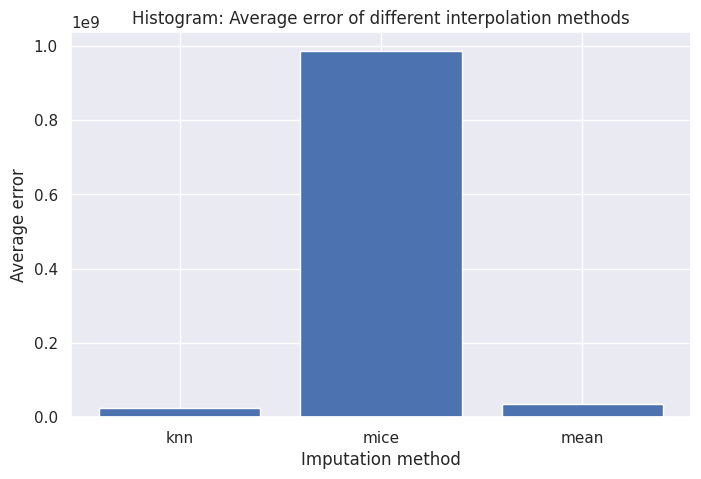

In [ ]:
import matplotlib.pyplot as plt

methods = ['knn', 'mice', 'mean']
average_errors = [
    percentage_change(
        knn_imputed_train_df_selected["Age"],
        knn_imputed_train_df_selected["Age_1_percent"]),

    percentage_change(
        train_df_selected["Age"],
        imputed_train_df_selected_1_percent["Age_1_percent"]
    ),

    percentage_change(
        mm_imputed_train_df_selected["Age"],
        mm_imputed_train_df_selected["Age_1_percent"])
        ]

plt.bar(methods, average_errors)

plt.title('Histogram: Average error of different interpolation methods')
plt.xlabel('Imputation method')
plt.ylabel('Average error')

# 显示柱状图
plt.show()


### 2. Efficiency of Mean, KNN, MICE Methods for Recovering 5% Missing Values

*  **KNN imputation**

In [ ]:
# This is the average error on residuals for 5% missing data imputed using KNN
print("Average error on residuals for 5% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["Age"],
        knn_imputed_train_df_selected["Age_5_percent"],
    )
)

Average error on residuals for 5% missing data imputed using KNN
5.804804667639457


* **MICE imputation**

In [ ]:
# This is the average error on residuals for 5% missing data imputed using MICE Imputation
print("Average error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["Age"],
        imputed_train_df_selected_5_percent["Age_5_percent"],
    )
)

Average error on residuals for 5% missing data imputed using MICE Imputation
1076005953.253595


* **Mean imputation**

In [ ]:
# This is the average error on residuals for 5% missing data imputed using Mean Imputation
print("Average error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_train_df_selected["Age"],
        mm_imputed_train_df_selected["Age_5_percent"],
    )
)

Average error on residuals for 5% missing data imputed using Mean Imputation
5.510388564376907


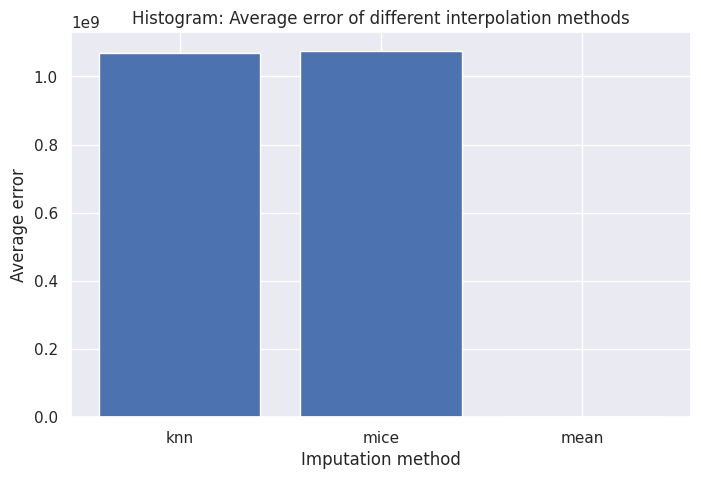

In [ ]:
import matplotlib.pyplot as plt

methods = ['knn', 'mice', 'mean']
average_errors = [
    percentage_change(
        knn_imputed_train_df_selected["Age"],
        knn_imputed_train_df_selected["Age_5_percent"]),

    percentage_change(
        train_df_selected["Age"],
        imputed_train_df_selected_5_percent["Age_5_percent"]
    ),

    percentage_change(
        mm_imputed_train_df_selected["Age"],
        mm_imputed_train_df_selected["Age_5_percent"])
        ]

plt.bar(methods, average_errors)

plt.title('Histogram: Average error of different interpolation methods')
plt.xlabel('Imputation method')
plt.ylabel('Average error')

# 显示柱状图
plt.show()

### 3. Efficiency of Mean, KNN, MICE Methods for Recovering 10% Missing Values

*  **KNN imputation**

In [ ]:
# This is the average error on residuals for 10% missing data imputed using KNN
print("Average error on residuals for 10% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["Age"],
        knn_imputed_train_df_selected["Age_10_percent"],
    )
)

Average error on residuals for 10% missing data imputed using KNN
89131637.23770246


* **MICE imputation**

In [ ]:
# This is the average error on residuals for 10% missing data imputed using MICE Imputation
print("Average error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["Age"],
        imputed_train_df_selected_10_percent["Age_10_percent"]
    )
)

Average error on residuals for 10% missing data imputed using MICE Imputation
987341829.454212


* **Mean imputation**

In [ ]:
# This is the average error on residuals for 10% missing data imputed using Mean Imputation
print("Average error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        train_df_selected["Age"],
        mm_imputed_train_df_selected["Age_10_percent"]
    )
)

Average error on residuals for 10% missing data imputed using Mean Imputation
109803808.43176916


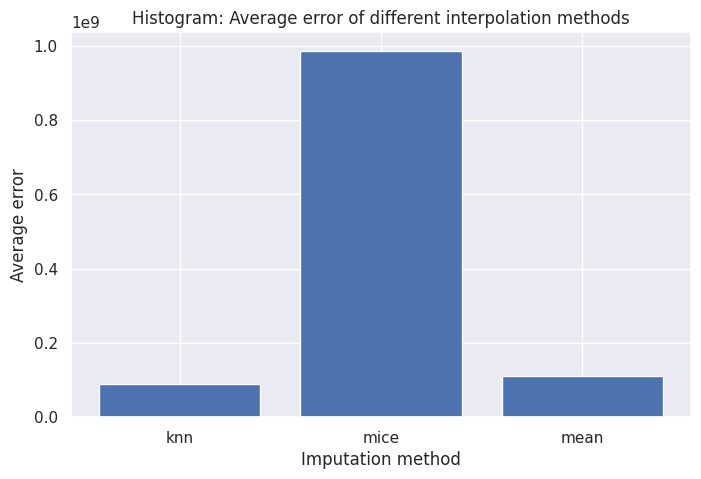

In [ ]:
import matplotlib.pyplot as plt

methods = ['knn', 'mice', 'mean']
average_errors = [
    percentage_change(
        knn_imputed_train_df_selected["Age"],
        knn_imputed_train_df_selected["Age_10_percent"]),

    percentage_change(
        train_df_selected["Age"],
        imputed_train_df_selected_10_percent["Age_10_percent"]
    ),

    percentage_change(
        train_df_selected["Age"],
        mm_imputed_train_df_selected["Age_10_percent"])
        ]

plt.bar(methods, average_errors)

plt.title('Histogram: Average error of different interpolation methods')
plt.xlabel('Imputation method')
plt.ylabel('Average error')

# 显示柱状图
plt.show()

From the above, we can see the comparison of the three Imputation methods, Mean Imputationand, KNN Imputation and MICE Imputation, in the three cases of 1%, 5% and 10% missing data respectively, we can see that overall though knn is the best effect imputation method in both 1% and 10% data missing cases. However, in all three cases of 1%, 5%, and 10% missing data, the mean imputation showed good imputation results with low error rates.

# 2. Worked Example 2: Data Science Salaries 2023
Now let's compare the effects of the imputation methods using a completely new data set, which is Data Science Salaries 2023 from kaggle.

Data Science Job Salaries Dataset contains 11 columns, each are:

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year
3. employment_type: The type of employment for the role
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year

## Step 1: Load Data and Import Libraries

In [ ]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ychetuo9/INFO6105_Assignment1/main/CSV/ds_salaries.csv')
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)

In [ ]:
print(df.shape)
df.head()

(3755, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


So, we have 9 columns with 3755 rows:

3 numeric columns : work_year, salary_in_usd,remote_ratio.

6 categorical columns : experience_level,employment_type, job_title, employee_residense, company_location, company_size.

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values to deal with!

## Step 2: Univariate Analysis

### Dealing with Categorical features

#### Experience Level

There's 4 categorical values  in column 'Experience Level', each are:


*  EN, which refers to Entry-level / Junior.

*   MI, which refers to Mid-level / Intermediate.

*   SE, which refers to Senior-level / Expert.

*   EX, which refers to Executive-level / Director.


In [ ]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values,
                title = 'Experience Level')
fig.show()

From treemap above, we observe that Senior-level/Expert accounts for the highest, and Mid-level/Intermediate ranked the next.

Followed by Entry Level and surprisingly Executive at the end.

####Job Designation

In [ ]:
print('Different job designations altogether :', len(set(df['job_title'])))

Different job designations altogether : 93


Next we will account for the most frequent job designations.

In [ ]:
top15_job_titles = df['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index,
            text = top15_job_titles.values, title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

Data Engineer, Data Scientist are the top 2 as usual, followed by Data Analyst and Machine Learning Engineer.

Wordcloud of the Job Designations :

In [ ]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [ ]:
def Word_Cloud(data, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width = 1200, height = 600, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)

    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

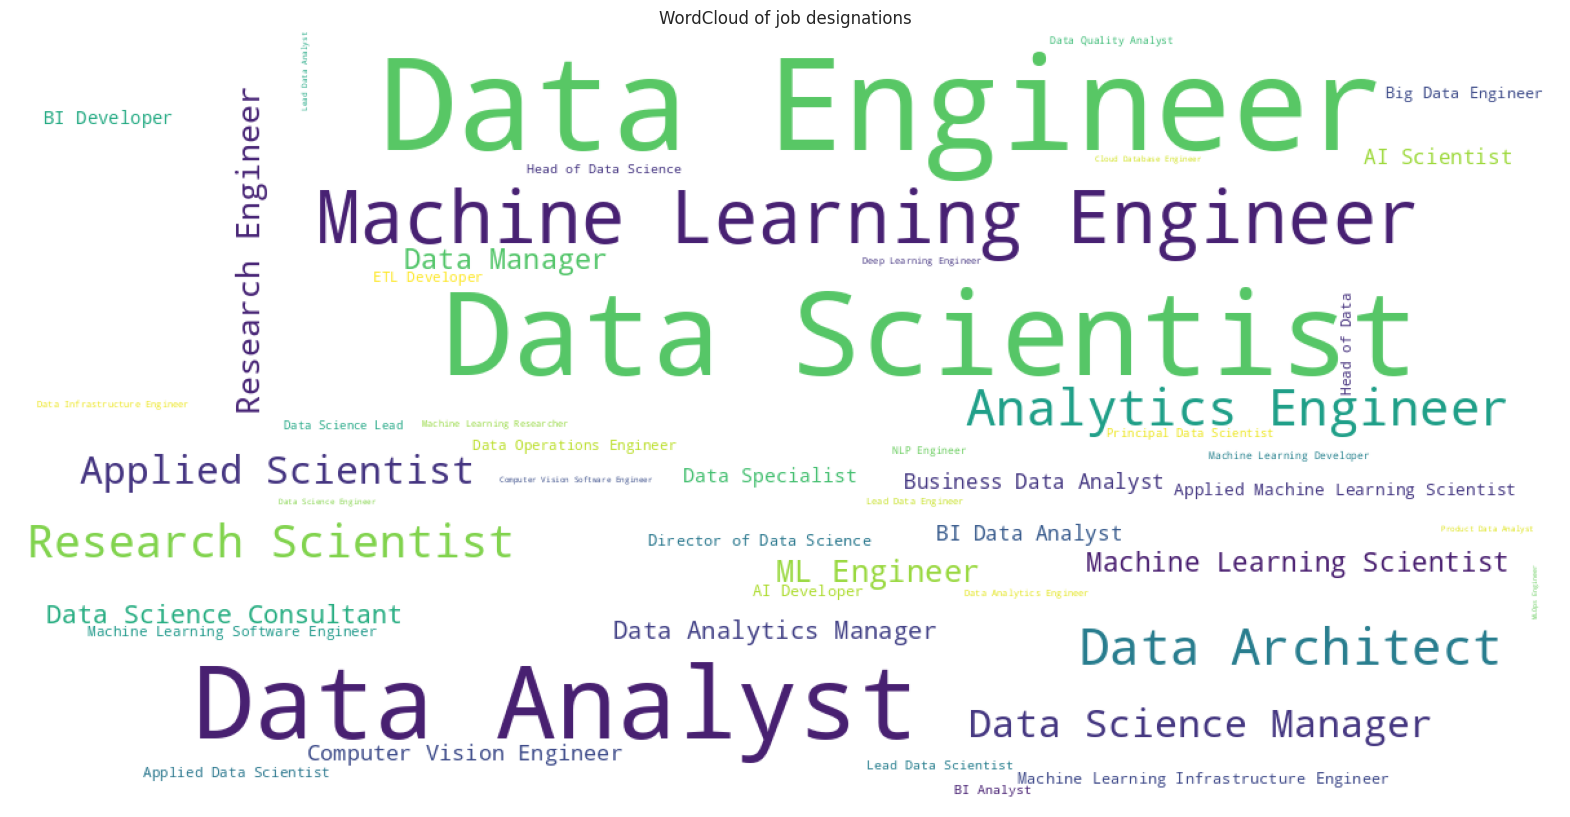

In [ ]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , 'WordCloud of job designations')

#### Employment Type

There are 4 employment types here :


*   PT : Part-time

*   FT : Full-time

*   CT : Contract

*   FL : Freelance


In [ ]:
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x = emp_type, y = group.values,
       color = group.index, text = group.values,
       title = 'Employment Type Distribution')

fig.update_layout( xaxis_title = "Employment Type", yaxis_title = "count")
fig.show()

Almost the entirety of employee type is full-time.

#### Relation between Employee Residence and Company Location

In [ ]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

In [ ]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Employee Loaction On Map')
fig.show()

Most of the employees are from USA as can be seen from the chloropleth above.

In [ ]:
top_15_emp_locations = residence[:15]
fig = px.bar(y = top_15_emp_locations.values, x = top_15_emp_locations.index,
            color = top_15_emp_locations.index, text = top_15_emp_locations.values,
            title = 'Top 15 Locations of Employees')

fig.update_layout( xaxis_title = "Location of Employees", yaxis_title = "count")
fig.show()

In terms of number of employees, USA leads followed by GBR, ESP and then IND.

In [ ]:
country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = country
company_location = df['company_location'].value_counts()
top_15_company_location = company_location[:15]

fig = go.Figure(data = [
    go.Bar(name = 'Employee Residence',
           x = top_15_emp_locations.index, y = top_15_emp_locations.values,
           text = top_15_emp_locations.values),
    go.Bar(name = 'Company Location', x = top_15_company_location.index,
           y = top_15_company_location.values, text = top_15_company_location.values)])

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title='Comparison of Employee Residence and Company Location')

fig.show()

As of 2023, most countries have similar number of employee residences and company locations.

#### Company Size</div>

In [ ]:
group = df['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index,
             color = group.index, text = group.values,
             title = 'Distribution of Company Size')

fig.update_layout(xaxis_title = "Company Size", yaxis_title = "count")
fig.show()

Company size mostly consists of medium sized comapnies and then the large sized ones followed by the small sized startups.

### Dealing with Numerical Features

#### Work Year

In [ ]:
work_year = df['work_year'].value_counts()
fig = px.pie(values = work_year.values, names = work_year.index,
            title = 'Work year distribution')
fig.show()

2023 year data accounts for about 47% in the dataset, followed by 2022 and so. Goes on to show the tremendous growth in this field through the years!

#### Salary in USD

In [ ]:
fig = px.box(y = df['salary_in_usd'], title = 'Salary in USD')
fig.show()

In [ ]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD')
fig.show()

We observe that salary in USD is mostly distributed between 95/100k - 175/180k.

#### Remote Ratio

Remote Ratio consists of 3 values :


*   0 : No remote work (less than 20%)

*   50 : Partially remote

*   100 : Fully remote (more than 80%)

In [ ]:
remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']

fig = px.bar(x = remote_type, y = df['remote_ratio'].value_counts().values,
       color = remote_type, text = df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution')

fig.update_layout( xaxis_title = "Remote Type", yaxis_title = "count")
fig.show()

As of 2023, Most companies still go the Fully Remote route, followed closely by the Hybrid/ Partially remote and then the No Remote policy.

## Step 3: Work Year Analysis

We do this to check whether remote ratio gets affected over time.

### Remote Ratio by Work Year

In [ ]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories,
            fill = 'toself', name = '2020 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 remote ratio'))

fig.show()

As from the rader plot, we observe that :

Remote work peaked during 2021 and that could be attributed to the pandemic. With time, no remote work policy has been applied again as it is the case for 2023.



## Step 4: Experience Level Analysis

### Employment Type wrt Experience Level

In [ ]:
exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_type['Entry-level/Junior'].index,
           y = exp_type['Entry-level/Junior'].values, text = exp_type['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_type['Executive-level/Director'].index,
           y = exp_type['Executive-level/Director'].values, text = exp_type['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_type['Mid-level/Intermediate'].index,
           y = exp_type['Mid-level/Intermediate'].values, text = exp_type['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_type['Senior-level/Expert'].index,
           y = exp_type['Senior-level/Expert'].values, text = exp_type['Senior-level/Expert'].values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level along with Employment Type')

fig.show()

In Full Time, Seniors are present in full force followed by executiuve and then the freshers.

### Top 5 Designations based on Experience

In [ ]:
exp_job = df.groupby(['experience_level','job_title']).size()

entry_top5 = exp_job['Entry-level/Junior'].sort_values(ascending = False)[:5]
executive_top5 = exp_job['Executive-level/Director'].sort_values(ascending = False)[:5]
mid_top5 = exp_job['Mid-level/Intermediate'].sort_values(ascending = False)[:5]
senior_top5 = exp_job['Senior-level/Expert'].sort_values(ascending = False)[:5]

exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Entry-level/Junior', x = entry_top5.index,
           y=entry_top5.values, text = entry_top5.values),
    go.Bar(name = 'Executive-level/Director', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
    go.Bar(name = 'Mid-level/Intermediate', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
    go.Bar(name = 'Senior-level/Expert', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level with top 5 job designations')
fig.show()

**Observations**

*   Data Architect only has senior experienced people in them.

* Entry-level/Junior tends to have data analyst position more in comparison to the data scientist and data engineer and ML Engineer.

* Mid-level/Intermediate tends to have data sceintist and data engineer position rather than analyst.

* Obviously, there's no data scientist and analyst job with Executive-level/Director but tends to have data engineer and director position.



*   Research Scientist is only comprised of the mid level/intermediate position


### Company Size based on Experience

In [ ]:
exp_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_size['Entry-level/Junior'].index,
           y = exp_size['Entry-level/Junior'].values, text = exp_size['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_size['Executive-level/Director'].index,
           y = exp_size['Executive-level/Director'].values, text = exp_size['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_size['Mid-level/Intermediate'].index,
           y = exp_size['Mid-level/Intermediate'].values, text = exp_size['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_size['Senior-level/Expert'].index,
           y = exp_size['Senior-level/Expert'].values, text = exp_size['Senior-level/Expert'].values),
])
fig.update_layout(xaxis_tickangle = -45, title = 'Experience Level with Company Size')

fig.show()

** Observations  **:



*   For large sized companies, there's mostly seniors followed by the intermediate and then the freshers. Very few executives can be seen.

*   For medium sized companies, it primarily comprises of senior level then followed by the intermediate and then the entry levelers. Executive a bit prominent compared to that of the large sized companies.

*   For small sized companies / startups, we see it consists all three levels apart from executives proportionally.




## Step 5: Company Location Analysis

### Company Location based on Experience

In [ ]:
exp_location = df.groupby(['experience_level','company_location']).size()

entry_location = exp_location['Entry-level/Junior']
executive_location = exp_location['Executive-level/Director']
mid_location = exp_location['Mid-level/Intermediate']
senior_location = exp_location['Senior-level/Expert']

fig1 = px.choropleth(locations = entry_location.index, color = entry_location.values,
                    title = 'Entry-level/Junior Company Location')

fig2 = px.choropleth(locations = mid_location.index, color = mid_location.values,
                    title = 'Mid-level/Intermediate Company Location')

fig3 = px.choropleth(locations = senior_location.index, color = senior_location.values,
                    title = 'Senior-level/Expert Company Location')

fig4 = px.choropleth(locations = executive_location.index, color = executive_location.values,
                    title = 'Executive-level/Director Company Location')

fig1.add_scattergeo(locations = entry_location.index, text = entry_location.values,  mode = 'text')
fig2.add_scattergeo(locations = mid_location.index, text = mid_location.values,  mode = 'text')
fig3.add_scattergeo(locations = senior_location.index, text = senior_location.values, mode = 'text')
fig4.add_scattergeo(locations = executive_location.index, text = executive_location.values,  mode = 'text')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

A higher level means tends to go to the United States
while lower levels often mean staying in one's own country. Even though this could be biased  since the number of workers in the data field is substantially high in USA compared to the other countries.

## Step 6: Salary Analysis

### Salary based on work year

In [ ]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]

hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'],
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns,
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Mean Salary by Work Year'))

fig1.update_layout(title = 'Salary Distribution based on Work Year')
fig2.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

There are higher salary amounts in 2023 and 2022 than the levels in 2021 and 2020.

The salary levels in 2021 and 2020 are about the same.

### Salary based on Experience

In [ ]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Mean Salary by Experience Level'))

fig1.update_layout(title = 'Salary Distribution based on Experience')
fig2.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")
fig1.show()
fig2.show()

We observe that the entry-level is distributed along with lower salaries while the executive-level is plotted along higher salaries.

### Salary based on Company Size

In [ ]:
company_size = df[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig1.update_layout(title = 'Salary Distribution based onk Company Size')
fig2.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

It is apparent that Medium sized of company is distributed along with higher salaries, and Large sized company has higher salaries than small size company.

Thus, we can get a conclusion as large size company not necessarily has higher salaries than medium sized company.

### Highest salaries based on Designation

In [ ]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Job Designation", yaxis_title = "Salaries ")
fig.update_layout(xaxis_tickangle = -45,
                  title = 'Top 25 Highest Salary by Designation')

Above are the 25 highest salaries listed through job designation.

### Average Salary based on Company Location

In [ ]:
salary_location = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
means = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations = means['company_location'], color = means['salary_in_usd'],
                    title = 'Average Salary by Company Location')
fig.show()

We observe that higher average salaries have brighter colours while lower average salaries have darker colours.

Here, we can see that USA and Russia have higher average salaries and brighter colours compared to the other countries.

Text(0.5, 1.0, 'Confusion Matrix')

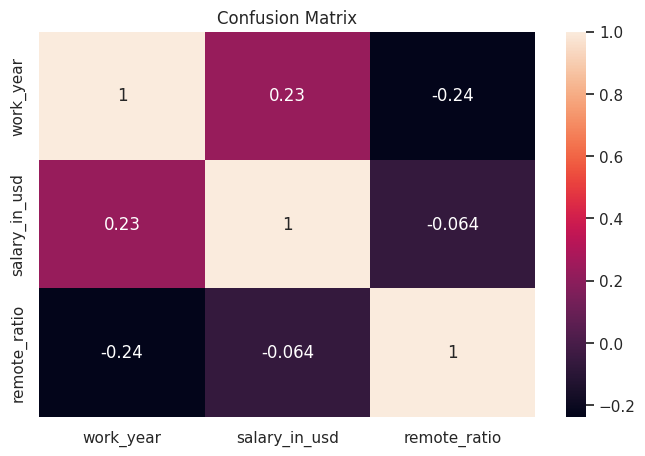

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(), annot = True)
plt.title('Confusion Matrix')

## Step 7: Turning categorical values to Numeric Representation
Next step, we need to make categorical variables into numeric representation so that we can apply calculations. In this case, we need to add more columns for several featrue.

Here, we respectively create new binary vaiables for 'experience_level', 'employment_type', 'job_title', 'employee_residence','company_location','company_size'.

get_dummies is the way to implement one hot encode using pandas.

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,FT,Principal Data Scientist,85847,ESP,100,ESP,L
1,2023,Mid-level/Intermediate,CT,ML Engineer,30000,USA,100,USA,S
2,2023,Mid-level/Intermediate,CT,ML Engineer,25500,USA,100,USA,S
3,2023,Senior-level/Expert,FT,Data Scientist,175000,CAN,100,CAN,M
4,2023,Senior-level/Expert,FT,Data Scientist,120000,CAN,100,CAN,M


In [ ]:
# Making categorical variables into numeric representation

new_df = pd.get_dummies(df, columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence','company_location','company_size'])
new_df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_Entry-level/Junior,experience_level_Executive-level/Director,experience_level_Mid-level/Intermediate,experience_level_Senior-level/Expert,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Engineer,job_title_Applied Machine Learning Scientist,job_title_Applied Scientist,job_title_Autonomous Vehicle Technician,job_title_Azure Data Engineer,job_title_BI Analyst,job_title_BI Data Analyst,job_title_BI Data Engineer,job_title_BI Developer,job_title_Big Data Architect,job_title_Big Data Engineer,job_title_Business Data Analyst,job_title_Business Intelligence Engineer,job_title_Cloud Data Architect,job_title_Cloud Data Engineer,job_title_Cloud Database Engineer,job_title_Compliance Data Analyst,job_title_Computer Vision Engineer,job_title_Computer Vision Software Engineer,job_title_Data Analyst,job_title_Data Analytics Consultant,job_title_Data Analytics Engineer,job_title_Data Analytics Lead,job_title_Data Analytics Manager,job_title_Data Analytics Specialist,job_title_Data Architect,job_title_Data DevOps Engineer,job_title_Data Engineer,job_title_Data Infrastructure Engineer,job_title_Data Lead,job_title_Data Management Specialist,job_title_Data Manager,job_title_Data Modeler,job_title_Data Operations Analyst,job_title_Data Operations Engineer,job_title_Data Quality Analyst,job_title_Data Science Consultant,job_title_Data Science Engineer,job_title_Data Science Lead,job_title_Data Science Manager,job_title_Data Science Tech Lead,job_title_Data Scientist,job_title_Data Scientist Lead,job_title_Data Specialist,job_title_Data Strategist,job_title_Deep Learning Engineer,job_title_Deep Learning Researcher,job_title_Director of Data Science,job_title_ETL Developer,job_title_ETL Engineer,job_title_Finance Data Analyst,job_title_Financial Data Analyst,job_title_Head of Data,job_title_Head of Data Science,job_title_Head of Machine Learning,job_title_Insight Analyst,job_title_Lead Data Analyst,job_title_Lead Data Engineer,job_title_Lead Data Scientist,job_title_Lead Machine Learning Engineer,job_title_ML Engineer,job_title_MLOps Engineer,job_title_Machine Learning Developer,job_title_Machine Learning Engineer,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Manager,job_title_Machine Learning Research Engineer,job_title_Machine Learning Researcher,job_title_Machine Learning Scientist,job_title_Machine Learning Software Engineer,job_title_Manager Data Management,job_title_Marketing Data Analyst,job_title_Marketing Data Engineer,job_title_NLP Engineer,job_title_Power BI Developer,job_title_Principal Data Analyst,job_title_Principal Data Architect,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,employee_residence_ARE,employee_residence_ARG,employee_residence_ARM,employee_residence_ASM,employee_residence_AUS,employee_residence_AUT,employee_residence_BEL,employee_residence_BGR,employee_residence_BIH,employee_residence_BOL,employee_residence_BRA,employee_residence_CAF,employee_residence_CAN,employee_residence_CHE,employee_residence_CHL,employee_residence_CHN,employee_residence_COL,employee_residence_CRI,employee_residence_CYP,employee_residence_CZE,employee_residence_DEU,employee_residence_DNK,employee_residence_DOM,employee_residence_DZA,employee_residence_EGY,employee_residence_ESP,employee_residence_EST,employee_residence_FIN,employee_residence_FRA,employee_residence_GBR,employee_residence_GHA,employee_residence_GRC,employee_residence_HKG,employee_residence_HN

## Step 7: Remove 1%, 5%, and 10% of your data randomly

After understanding and analyzing the database in detail, let's now perform random lost data processing on the data. As you can see from the previous code, this dataset is supposed to have no null values, so now you can just select 1000 random rows in this dataset for processing.

First we remove the three characters 'work_year' from the data set. Because the entire data set is at 2023 salary levels, there is little point in impute it.

In [ ]:
train_df_selected_clean = new_df.drop(['work_year'], axis = 1)

In [ ]:
# Selecting 1000 random rows with no null data points
train_df_selected = train_df_selected_clean.sample(n=1000)

In [ ]:
# Creating three extra coloumns of Item_Weight for performing Data Imputation techniques
train_df_selected["salary_in_usd_1_percent"] = train_df_selected[["salary_in_usd"]]
train_df_selected["salary_in_usd_5_percent"] = train_df_selected[["salary_in_usd"]]
train_df_selected["salary_in_usd_10_percent"] = train_df_selected[["salary_in_usd"]]

Since this question has a requirement for the percentage of missing data, we create a Function to calculate percentage of missing data in dataset and a Function to create missing values.

In [ ]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


## Step 8: Impute missing value using Mean, KNN, MICE
Here we use a total of three methods to fill the blank values:
1. Mean
2. KNN
3. MICE

Here we create a function that uses mean imputation to impute data and a function to calculates the degree of data recovery after performing the data imputation.

In [ ]:
# Function to impute data using mean imputation
def mean_impute(new_raw_data):
    mm_impute_train_df = new_raw_data.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["salary_in_usd_1_percent"] = mm_impute_train_df[
        "salary_in_usd_1_percent"
    ].fillna(mm_impute_train_df["salary_in_usd"].mean())
    mm_impute_train_df["salary_in_usd_5_percent"] = mm_impute_train_df[
        "salary_in_usd_5_percent"
    ].fillna(mm_impute_train_df["salary_in_usd"].mean())
    mm_impute_train_df["salary_in_usd_10_percent"] = mm_impute_train_df[
        "salary_in_usd_10_percent"
    ].fillna(mm_impute_train_df["salary_in_usd"].mean())
    return mm_impute_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [ ]:
print(get_percent_missing(train_df_selected))

                                                                                          column_name  \
salary_in_usd                                                                           salary_in_usd   
remote_ratio                                                                             remote_ratio   
experience_level_Entry-level/Junior                               experience_level_Entry-level/Junior   
experience_level_Executive-level/Director                   experience_level_Executive-level/Director   
experience_level_Mid-level/Intermediate                       experience_level_Mid-level/Intermediate   
experience_level_Senior-level/Expert                             experience_level_Senior-level/Expert   
employment_type_CT                                                                 employment_type_CT   
employment_type_FL                                                                 employment_type_FL   
employment_type_FT                                     

Here we create missing values in respected coloumns to perform data imputation.

In [ ]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(train_df_selected, 0.01, "salary_in_usd_1_percent")
create_missing(train_df_selected, 0.05, "salary_in_usd_5_percent")
create_missing(train_df_selected, 0.1, "salary_in_usd_10_percent")

In [ ]:
# Double Checking the imputation operation
print(get_percent_missing(train_df_selected))

                                                                                          column_name  \
salary_in_usd                                                                           salary_in_usd   
remote_ratio                                                                             remote_ratio   
experience_level_Entry-level/Junior                               experience_level_Entry-level/Junior   
experience_level_Executive-level/Director                   experience_level_Executive-level/Director   
experience_level_Mid-level/Intermediate                       experience_level_Mid-level/Intermediate   
experience_level_Senior-level/Expert                             experience_level_Senior-level/Expert   
employment_type_CT                                                                 employment_type_CT   
employment_type_FL                                                                 employment_type_FL   
employment_type_FT                                     

We can see now we successfully create data with 1%, 5%, 10% missing data.

### 1. Mean Imputation
We first performing Mean Imputation.

In [ ]:
# Performing Mean Imputation
mm_imputed_train_df_selected = mean_impute(train_df_selected)

In [ ]:
# Double Checking the operation of mean-imputation
print(get_percent_missing(mm_imputed_train_df_selected))

                                                                                          column_name  \
salary_in_usd                                                                           salary_in_usd   
remote_ratio                                                                             remote_ratio   
experience_level_Entry-level/Junior                               experience_level_Entry-level/Junior   
experience_level_Executive-level/Director                   experience_level_Executive-level/Director   
experience_level_Mid-level/Intermediate                       experience_level_Mid-level/Intermediate   
experience_level_Senior-level/Expert                             experience_level_Senior-level/Expert   
employment_type_CT                                                                 employment_type_CT   
employment_type_FL                                                                 employment_type_FL   
employment_type_FT                                     

### 2. KNN imputation
The second filling method we use is KNN, first we have to do the installation of fancyimpute and import package. Then we create knn_impute function to use KNN to impute the data.

In [ ]:
!pip install fancyimpute
from fancyimpute import KNN
from fancyimpute import IterativeImputer as MICE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Initializing objects
imputer = KNN()

# Function to impute data using KNN method
def knn_impute(train_df):
    knn_impute_train_df = pd.DataFrame(
        (imputer.fit_transform(train_df)), columns=train_df.columns
    )
    return knn_impute_train_df

In [ ]:
knn_imputed_train_df_selected = knn_impute(train_df_selected)

Imputing row 1/1000 with 0 missing, elapsed time: 2.033
Imputing row 101/1000 with 1 missing, elapsed time: 2.035
Imputing row 201/1000 with 1 missing, elapsed time: 2.037
Imputing row 301/1000 with 0 missing, elapsed time: 2.038
Imputing row 401/1000 with 0 missing, elapsed time: 2.040
Imputing row 501/1000 with 1 missing, elapsed time: 2.042
Imputing row 601/1000 with 0 missing, elapsed time: 2.043
Imputing row 701/1000 with 0 missing, elapsed time: 2.045
Imputing row 801/1000 with 0 missing, elapsed time: 2.046
Imputing row 901/1000 with 0 missing, elapsed time: 2.048


In [ ]:
print(get_percent_missing(knn_imputed_train_df_selected))


                                                                                          column_name  \
salary_in_usd                                                                           salary_in_usd   
remote_ratio                                                                             remote_ratio   
experience_level_Entry-level/Junior                               experience_level_Entry-level/Junior   
experience_level_Executive-level/Director                   experience_level_Executive-level/Director   
experience_level_Mid-level/Intermediate                       experience_level_Mid-level/Intermediate   
experience_level_Senior-level/Expert                             experience_level_Senior-level/Expert   
employment_type_CT                                                                 employment_type_CT   
employment_type_FL                                                                 employment_type_FL   
employment_type_FT                                     

### 3. MICE Imputation
Finally we use MICE Imputation to do the data imputation. And we create mice_impute function to impute data using MICE method.

In [ ]:
# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df

In [ ]:
# Dataframe for 1% missing value
train_df_selected_1_percent = train_df_selected.drop(
    ["salary_in_usd", "salary_in_usd_5_percent", "salary_in_usd_10_percent"], axis=1
)
# Dataframe for 5% missing value
train_df_selected_5_percent = train_df_selected.drop(
    ["salary_in_usd", "salary_in_usd_1_percent", "salary_in_usd_10_percent"], axis=1
)
# Dataframe for 10% missing value
train_df_selected_10_percent = train_df_selected.drop(
    ["salary_in_usd", "salary_in_usd_1_percent", "salary_in_usd_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
imputed_train_df_selected_1_percent = mice_impute(train_df_selected_1_percent)
# Performing Imputation on Dataframe with 5% missing values
imputed_train_df_selected_5_percent = mice_impute(train_df_selected_5_percent)
# Performing Imputation on Dataframe with 10% missing values
imputed_train_df_selected_10_percent = mice_impute(train_df_selected_10_percent)

## Step 10: Evaluating the Efficiency of Mean, KNN, MICE Methods for Recovering Difference Level of Missing Values
With the three filling methods demonstrated, we can now check the effect of the different methods in different cases of missing data.

### 1. Efficiency of Mean, KNN, MICE Methods for Recovering 1% Missing Values

*  **KNN imputation**

In [ ]:
# This is the average error on residuals for 1% missing data imputed using KNN
print("Average error on residuals for 1% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["salary_in_usd"],
        knn_imputed_train_df_selected["salary_in_usd_1_percent"],
    )
)

Average error on residuals for 1% missing data imputed using KNN
0.00030029834899622797


* **MICE imputation**

In [ ]:
# This is the average error on residuals for 1% missing data imputed using MICE Imputation
print("Average error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["salary_in_usd"],
        imputed_train_df_selected_1_percent["salary_in_usd_1_percent"],
    )
)

Average error on residuals for 1% missing data imputed using MICE Imputation
52.39624911712569


* **Mean imputation**

In [ ]:
# This is the average error on residuals for 1% missing data imputed using Mean Imputation
print("Average error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_train_df_selected["salary_in_usd"],
        mm_imputed_train_df_selected["salary_in_usd_1_percent"],
    )
)

Average error on residuals for 1% missing data imputed using Mean Imputation
0.35622746476642814


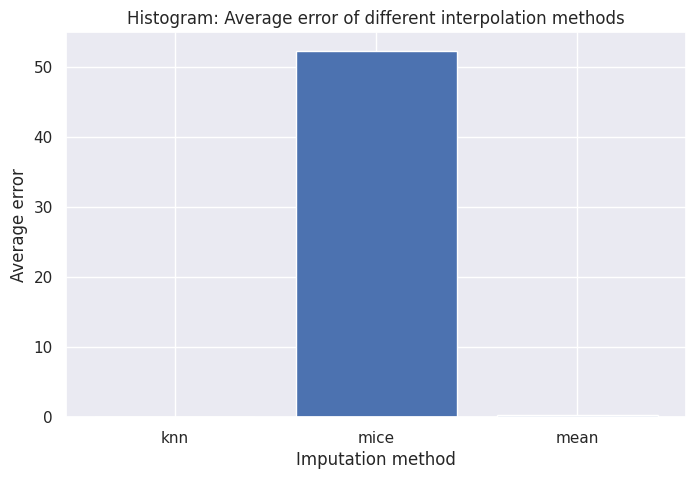

In [ ]:
import matplotlib.pyplot as plt

methods = ['knn', 'mice', 'mean']
average_errors = [
    percentage_change(
        knn_imputed_train_df_selected["salary_in_usd"],
        knn_imputed_train_df_selected["salary_in_usd_1_percent"]),

    percentage_change(
        train_df_selected["salary_in_usd"],
        imputed_train_df_selected_1_percent["salary_in_usd_1_percent"]
    ),

    percentage_change(
        mm_imputed_train_df_selected["salary_in_usd"],
        mm_imputed_train_df_selected["salary_in_usd_1_percent"])
        ]

plt.bar(methods, average_errors)

plt.title('Histogram: Average error of different interpolation methods')
plt.xlabel('Imputation method')
plt.ylabel('Average error')

plt.show()


### 2. Efficiency of Mean, KNN, MICE Methods for Recovering 5% Missing Values

*  **KNN imputation**

In [ ]:
# This is the average error on residuals for 5% missing data imputed using KNN
print("Average error on residuals for 5% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["salary_in_usd"],
        knn_imputed_train_df_selected["salary_in_usd_5_percent"],
    )
)

Average error on residuals for 5% missing data imputed using KNN
0.002487923991635425


* **MICE imputation**

In [ ]:
# This is the average error on residuals for 5% missing data imputed using MICE Imputation
print("Average error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["salary_in_usd"],
        imputed_train_df_selected_5_percent["salary_in_usd_5_percent"],
    )
)

Average error on residuals for 5% missing data imputed using MICE Imputation
51.311695960925874


* **Mean imputation**

In [ ]:
# This is the average error on residuals for 5% missing data imputed using Mean Imputation
print("Average error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_train_df_selected["salary_in_usd"],
        mm_imputed_train_df_selected["salary_in_usd_5_percent"],
    )
)

Average error on residuals for 5% missing data imputed using Mean Imputation
2.5590429162763453


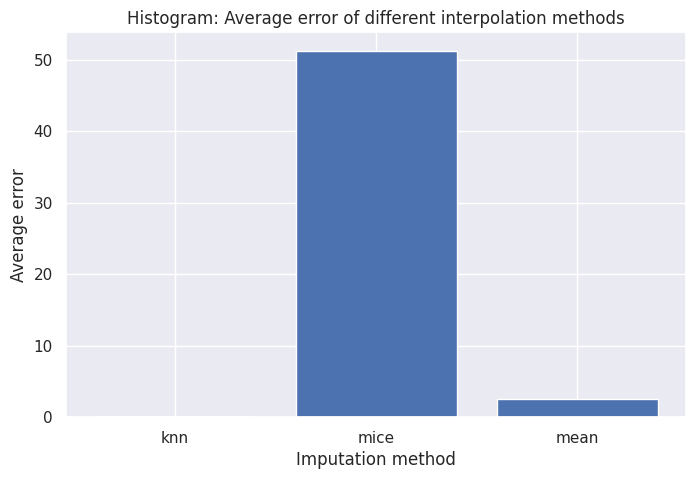

In [ ]:
import matplotlib.pyplot as plt

methods = ['knn', 'mice', 'mean']
average_errors = [
    percentage_change(
        knn_imputed_train_df_selected["salary_in_usd"],
        knn_imputed_train_df_selected["salary_in_usd_5_percent"]),

    percentage_change(
        train_df_selected["salary_in_usd"],
        imputed_train_df_selected_5_percent["salary_in_usd_5_percent"]
    ),

    percentage_change(
        mm_imputed_train_df_selected["salary_in_usd"],
        mm_imputed_train_df_selected["salary_in_usd_5_percent"])
        ]

plt.bar(methods, average_errors)

plt.title('Histogram: Average error of different interpolation methods')
plt.xlabel('Imputation method')
plt.ylabel('Average error')

plt.show()

### 3. Efficiency of Mean, KNN, MICE Methods for Recovering 10% Missing Values

*  **KNN imputation**

In [ ]:
# This is the average error on residuals for 10% missing data imputed using KNN
print("Average error on residuals for 10% missing data imputed using KNN")
print(
    percentage_change(
        knn_imputed_train_df_selected["salary_in_usd"],
        knn_imputed_train_df_selected["salary_in_usd_10_percent"],
    )
)

Average error on residuals for 10% missing data imputed using KNN
0.00932347081877054


* **MICE imputation**

In [ ]:
# This is the average error on residuals for 10% missing data imputed using MICE Imputation
print("Average error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        train_df_selected["salary_in_usd"],
        imputed_train_df_selected_10_percent["salary_in_usd_10_percent"]
    )
)

Average error on residuals for 10% missing data imputed using MICE Imputation
51.44522800714405


* **Mean imputation**

In [ ]:
# This is the average error on residuals for 10% missing data imputed using Mean Imputation
print("Average error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        train_df_selected["salary_in_usd"],
        mm_imputed_train_df_selected["salary_in_usd_10_percent"]
    )
)

Average error on residuals for 10% missing data imputed using Mean Imputation
6.5868751179844285


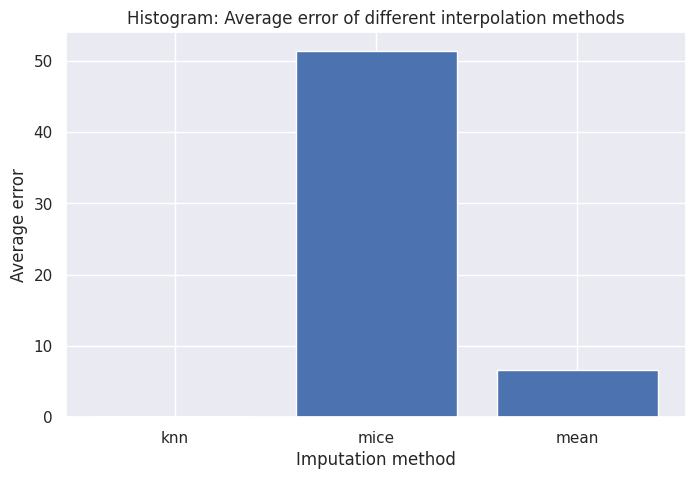

In [ ]:
import matplotlib.pyplot as plt

methods = ['knn', 'mice', 'mean']
average_errors = [
    percentage_change(
        knn_imputed_train_df_selected["salary_in_usd"],
        knn_imputed_train_df_selected["salary_in_usd_10_percent"]),

    percentage_change(
        train_df_selected["salary_in_usd"],
        imputed_train_df_selected_10_percent["salary_in_usd_10_percent"]
    ),

    percentage_change(
        train_df_selected["salary_in_usd"],
        mm_imputed_train_df_selected["salary_in_usd_10_percent"])
        ]

plt.bar(methods, average_errors)

plt.title('Histogram: Average error of different interpolation methods')
plt.xlabel('Imputation method')
plt.ylabel('Average error')

plt.show()

From the above, we can see the comparison of the three Imputation methods, Mean Imputationand, KNN Imputation and MICE Imputation, in the three cases of 1%, 5% and 10% missing data respectively, we can see that for this dataset, KNN imputation is the best imputation method with the best results in the 1%, 5% and 10% missing data cases. The average imputation method also performs well in all 3 cases, second only to knn imputation. While MICE imputation is clearly second to the other two

# Conclusion
In conclusion, imputation is an important technique for handling missing data in data science. There are several imputation methods available, each with its own strengths and weaknesses. It is important to carefully consider the type of missing data present in the dataset and the assumptions underlying each imputation method before selecting a method. It is also important to check the assumptions of the selected imputation method and to perform sensitivity analyses to assess the impact of missing data on the results of the analysis. With these considerations in mind, imputation can be a valuable tool for improving the accuracy and reliability of data analysis in the presence of missing data.





# Reference
* https://www.missingdata.nl/missing-data/missing-data-methods/imputation-methods/
* https://www.numpyninja.com/post/mice-algorithm-to-impute-missing-values-in-a-dataset#:~:text=MICE%20stands%20for%20Multivariate%20Imputation,prediction%20for%20each%20missing%20value.
* https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/
* https://www.javatpoint.com/missing-data-conundrum-exploration-and-imputation-techniques

# License
Copyright [2023] [Yanyan Chen]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.